In [37]:
import pandas as pd
import numpy as np

from datetime import date
import re
from random import randint as rnd

import matplotlib.pyplot as plt

# EDA Current Data

In [38]:
df = pd.read_excel("Intelligent Meter - Inventory Management System Dataset.xlsx",sheet_name="Meter Info")
df.head(10)

,Region,Serial Number,Meter Size,Meter Type,Meter Manufacturer,Meter Model,Meter Installation Date,Meter Age,Meter Mileage,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Petaling,AIS17BA00XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,PSM Volumetric 15mm,2017-12-18,6.526027,41417,NaN,Data Dictionary,NaN
1,Gombak,AIS21CA00XXXXX,20,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,PSM Volumetric 20mm,2022-04-29,1.849315,91040,NaN,Region:,Region where the meter being installed
2,Gombak,AIS23PD00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,Glass Fibre Grivory Meter 15mm,2023-03-14,0.975342,20505,NaN,Serial Number:,Unique meter serial number
3,Hulu Langat,RSYA0501XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,Ningbo Water Meter,LXH 15B 15mm,2017-12-13,10.531507,5508,NaN,Meter Size:,Size of the meter in mm
4,Gombak,AIS22PD02XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,Glass Fibre Grivory Meter 15mm,2022-08-12,1.561644,10156,NaN,Meter Type:,Type of the meter
5,Petaling,AIS17DA00XXXXX,25,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,PSM Volumetric 25mm,2017-12-20,6.556164,5015,NaN,Meter Manufacturer:,Manufacturer of the meter
6,Gombak,AIS21CA00XXXXX,20,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,PSM Volumetric 20mm,2022-02-15,2.049315,19635,NaN,Meter Model:,Model of the meter
7,Kuala Lumpur,PUAS041015XXXXX,150,Mechanical Meter - Ductile Iron Body & Woltman...,George Kent Malaysia,"HELIX METER 6"" METER",2017-12-15,18.786301,89084,NaN,Meter Installation Date:,Install date of the meter at the customer's pr...
8,Gombak,AIS17PA03XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,George Kent Malaysia,KSM Volumetric 15mm,2018-04-10,5.904110,18333,NaN,Meter Age:,Age of the meter
9,Hulu Langat,AIS23PD03XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,Glass Fibre Grivory Meter 15mm,2024-02-24,0.024658,30714,NaN,Meter Mileage:,Mileage of the meter


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Region                   200 non-null    object        
 1   Serial Number            200 non-null    object        
 2   Meter Size               200 non-null    int64         
 3   Meter Type               200 non-null    object        
 4   Meter Manufacturer       200 non-null    object        
 5   Meter Model              200 non-null    object        
 6   Meter Installation Date  200 non-null    datetime64[ns]
 7   Meter Age                200 non-null    float64       
 8   Meter Mileage            200 non-null    int64         
 9   Unnamed: 9               0 non-null      float64       
 10  Unnamed: 10              10 non-null     object        
 11  Unnamed: 11              9 non-null      object        
dtypes: datetime64[ns](1), float64(2), in

In [40]:
#
df.drop(columns=['Unnamed: 9','Unnamed: 10','Unnamed: 11'], axis = 0, inplace = True)
df

,Region,Serial Number,Meter Size,Meter Type,Meter Manufacturer,Meter Model,Meter Installation Date,Meter Age,Meter Mileage
0,Petaling,AIS17BA00XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,PSM Volumetric 15mm,2017-12-18,6.526027,41417
1,Gombak,AIS21CA00XXXXX,20,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,PSM Volumetric 20mm,2022-04-29,1.849315,91040
2,Gombak,AIS23PD00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,Glass Fibre Grivory Meter 15mm,2023-03-14,0.975342,20505
3,Hulu Langat,RSYA0501XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,Ningbo Water Meter,LXH 15B 15mm,2017-12-13,10.531507,5508
4,Gombak,AIS22PD02XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,Glass Fibre Grivory Meter 15mm,2022-08-12,1.561644,10156
...,...,...,...,...,...,...,...,...,...
195,Sepang,AIS21PE00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,VSD Automation Sdn. Bhd.,LXHG-15/S,2021-12-02,2.254795,34293
196,Sepang,AIS22PD01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,Glass Fibre Grivory Meter 15mm,2022-07-28,1.602740,16779
197,Kuala Selangor,SYA15P01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Delta Perdana Sdn Bhd,DPM-15P 15mm,2017-12-16,8.372603,16076
198,Petaling,AIS19PA00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,George Kent Malaysia,KSM Volumetric 15mm,2019-03-18,4.967123,7016


In [41]:
df['Meter Manufacturer'].value_counts()

Meter Manufacturer
George Kent Malaysia         104
Aqua Flo Sdn. Bhd.            42
Ningbo Water Meter            26
VSD Automation Sdn. Bhd.      13
Delta Perdana Sdn Bhd          6
Sensus                         4
KAMSTRUP                       3
ABB                            1
Progressive Crest Sdn Bhd      1
Name: count, dtype: int64

In [42]:
len(df['Meter Model'].value_counts())

32

In [43]:
df[df['Meter Manufacturer']=='Delta Perdana Sdn Bhd'][['Meter Model','Meter Size']].value_counts()

Meter Model   Meter Size
DPM-15P 15mm  15            6
Name: count, dtype: int64

In practical use to put each meter model is not doable unless you have a lot of data on every each meter model. Thus we can drop the meter model column

In [44]:
drop_col = 'Meter Model'
df.drop(columns=drop_col,axis=1,inplace=True)
df

,Region,Serial Number,Meter Size,Meter Type,Meter Manufacturer,Meter Installation Date,Meter Age,Meter Mileage
0,Petaling,AIS17BA00XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,2017-12-18,6.526027,41417
1,Gombak,AIS21CA00XXXXX,20,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,2022-04-29,1.849315,91040
2,Gombak,AIS23PD00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2023-03-14,0.975342,20505
3,Hulu Langat,RSYA0501XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,Ningbo Water Meter,2017-12-13,10.531507,5508
4,Gombak,AIS22PD02XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2022-08-12,1.561644,10156
...,...,...,...,...,...,...,...,...
195,Sepang,AIS21PE00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,VSD Automation Sdn. Bhd.,2021-12-02,2.254795,34293
196,Sepang,AIS22PD01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2022-07-28,1.602740,16779
197,Kuala Selangor,SYA15P01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Delta Perdana Sdn Bhd,2017-12-16,8.372603,16076
198,Petaling,AIS19PA00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,George Kent Malaysia,2019-03-18,4.967123,7016


<Axes: ylabel='Frequency'>

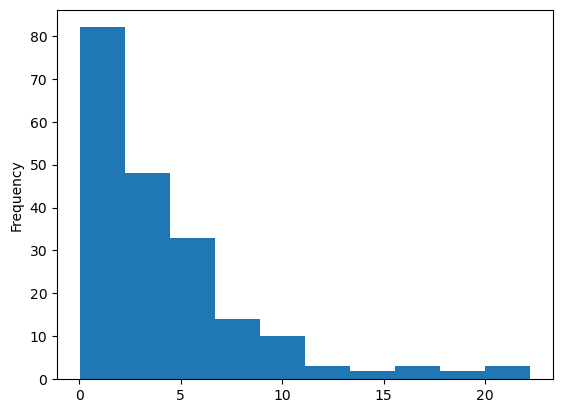

In [45]:
df['Meter Age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

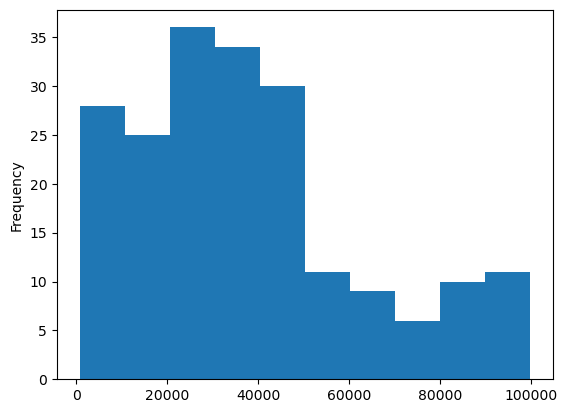

In [46]:
df['Meter Mileage'].plot(kind='hist')

In [47]:
today = date.today()
df['Today Date'] = today
df

,Region,Serial Number,Meter Size,Meter Type,Meter Manufacturer,Meter Installation Date,Meter Age,Meter Mileage,Today Date
0,Petaling,AIS17BA00XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,2017-12-18,6.526027,41417,2024-04-25
1,Gombak,AIS21CA00XXXXX,20,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,2022-04-29,1.849315,91040,2024-04-25
2,Gombak,AIS23PD00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2023-03-14,0.975342,20505,2024-04-25
3,Hulu Langat,RSYA0501XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,Ningbo Water Meter,2017-12-13,10.531507,5508,2024-04-25
4,Gombak,AIS22PD02XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2022-08-12,1.561644,10156,2024-04-25
...,...,...,...,...,...,...,...,...,...
195,Sepang,AIS21PE00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,VSD Automation Sdn. Bhd.,2021-12-02,2.254795,34293,2024-04-25
196,Sepang,AIS22PD01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2022-07-28,1.602740,16779,2024-04-25
197,Kuala Selangor,SYA15P01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Delta Perdana Sdn Bhd,2017-12-16,8.372603,16076,2024-04-25
198,Petaling,AIS19PA00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,George Kent Malaysia,2019-03-18,4.967123,7016,2024-04-25


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Region                   200 non-null    object        
 1   Serial Number            200 non-null    object        
 2   Meter Size               200 non-null    int64         
 3   Meter Type               200 non-null    object        
 4   Meter Manufacturer       200 non-null    object        
 5   Meter Installation Date  200 non-null    datetime64[ns]
 6   Meter Age                200 non-null    float64       
 7   Meter Mileage            200 non-null    int64         
 8   Today Date               200 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 14.2+ KB


In [49]:
df['Today Date'] = pd.to_datetime(df['Today Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Region                   200 non-null    object        
 1   Serial Number            200 non-null    object        
 2   Meter Size               200 non-null    int64         
 3   Meter Type               200 non-null    object        
 4   Meter Manufacturer       200 non-null    object        
 5   Meter Installation Date  200 non-null    datetime64[ns]
 6   Meter Age                200 non-null    float64       
 7   Meter Mileage            200 non-null    int64         
 8   Today Date               200 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [50]:
df['Installed Period'] = (df['Today Date'] - df['Meter Installation Date'])/np.timedelta64(1,'Y')
df

,Region,Serial Number,Meter Size,Meter Type,Meter Manufacturer,Meter Installation Date,Meter Age,Meter Mileage,Today Date,Installed Period
0,Petaling,AIS17BA00XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,2017-12-18,6.526027,41417,2024-04-25,6.356164
1,Gombak,AIS21CA00XXXXX,20,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,2022-04-29,1.849315,91040,2024-04-25,1.991781
2,Gombak,AIS23PD00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2023-03-14,0.975342,20505,2024-04-25,1.117808
3,Hulu Langat,RSYA0501XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,Ningbo Water Meter,2017-12-13,10.531507,5508,2024-04-25,6.369863
4,Gombak,AIS22PD02XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2022-08-12,1.561644,10156,2024-04-25,1.704110
...,...,...,...,...,...,...,...,...,...,...
195,Sepang,AIS21PE00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,VSD Automation Sdn. Bhd.,2021-12-02,2.254795,34293,2024-04-25,2.397260
196,Sepang,AIS22PD01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2022-07-28,1.602740,16779,2024-04-25,1.745205
197,Kuala Selangor,SYA15P01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Delta Perdana Sdn Bhd,2017-12-16,8.372603,16076,2024-04-25,6.361644
198,Petaling,AIS19PA00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,George Kent Malaysia,2019-03-18,4.967123,7016,2024-04-25,5.109589


In [51]:
df.sort_values(by='Installed Period',ascending=False)

,Region,Serial Number,Meter Size,Meter Type,Meter Manufacturer,Meter Installation Date,Meter Age,Meter Mileage,Today Date,Installed Period
64,Kuala Selangor,SYA15E00XXXXX,40,Mechanical Meter - Brass Body & Piston Volumet...,Ningbo Water Meter,2017-12-01,7.679452,49369,2024-04-25,6.402740
79,Kuala Lumpur,RSYA0501XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,Ningbo Water Meter,2017-12-01,9.679452,39399,2024-04-25,6.402740
148,Kuala Langat,AIS17PA00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,George Kent Malaysia,2017-12-01,6.884932,23596,2024-04-25,6.402740
38,Sabak Bernam,SYA14J00XXXXX,150,Mechanical Meter - Cast Iron Body & Woltmann T...,Ningbo Water Meter,2017-12-02,8.775342,75114,2024-04-25,6.400000
51,Hulu Selangor,SYA13H00XXXXX,100,Mechanical Meter - Cast Iron Body & Woltmann T...,Ningbo Water Meter,2017-12-02,9.317808,96640,2024-04-25,6.400000
...,...,...,...,...,...,...,...,...,...,...
80,Petaling,AIS23CE00XXXXX,20,Mechanical Meter - Brass Body & Piston Volumet...,VSD Automation Sdn. Bhd.,2024-01-04,0.164384,4458,2024-04-25,0.306849
185,Gombak,AIS23DD00XXXXX,25,Mechanical Meter - Brass Body & Piston Volumet...,Aqua Flo Sdn. Bhd.,2024-01-23,0.112329,36096,2024-04-25,0.254795
45,Petaling,AIS23PE00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,VSD Automation Sdn. Bhd.,2024-01-29,0.095890,26784,2024-04-25,0.238356
181,Gombak,AIS22ED00XXXXX,40,Mechanical Meter - Brass Body & Piston Volumet...,Aqua Flo Sdn. Bhd.,2024-02-08,0.068493,92665,2024-04-25,0.210959


The Installed period are not the same as the Meter Age. It does not collide the same data. As we dont know how their calculations we will use my own calcalation for this time.

In [52]:
drop_col = ['Today Date','Meter Age']
df.drop(columns=drop_col,axis=1,inplace=True)
df

,Region,Serial Number,Meter Size,Meter Type,Meter Manufacturer,Meter Installation Date,Meter Mileage,Installed Period
0,Petaling,AIS17BA00XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,2017-12-18,41417,6.356164
1,Gombak,AIS21CA00XXXXX,20,Mechanical Meter - Brass Body & Piston Volumet...,George Kent Malaysia,2022-04-29,91040,1.991781
2,Gombak,AIS23PD00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2023-03-14,20505,1.117808
3,Hulu Langat,RSYA0501XXXXX,15,Mechanical Meter - Brass Body & Piston Volumet...,Ningbo Water Meter,2017-12-13,5508,6.369863
4,Gombak,AIS22PD02XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2022-08-12,10156,1.704110
...,...,...,...,...,...,...,...,...
195,Sepang,AIS21PE00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,VSD Automation Sdn. Bhd.,2021-12-02,34293,2.397260
196,Sepang,AIS22PD01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Aqua Flo Sdn. Bhd.,2022-07-28,16779,1.745205
197,Kuala Selangor,SYA15P01XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,Delta Perdana Sdn Bhd,2017-12-16,16076,6.361644
198,Petaling,AIS19PA00XXXXX,15,Mechanical Meter - Plastic Body & Piston Volum...,George Kent Malaysia,2019-03-18,7016,5.109589


In [53]:
df['Region'].value_counts()

Region
Petaling          46
Klang             41
Gombak            28
Kuala Lumpur      28
Hulu Langat       15
Hulu Selangor     11
Sepang            11
Kuala Selangor     9
Kuala Langat       8
Sabak Bernam       3
Name: count, dtype: int64

# Data Mockup

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Region                   200 non-null    object        
 1   Serial Number            200 non-null    object        
 2   Meter Size               200 non-null    int64         
 3   Meter Type               200 non-null    object        
 4   Meter Manufacturer       200 non-null    object        
 5   Meter Installation Date  200 non-null    datetime64[ns]
 6   Meter Mileage            200 non-null    int64         
 7   Installed Period         200 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 12.6+ KB


column to mockup is acc_type 

This is to show different environment of the water meter other than region

In [54]:
#From open source data
df_ref = pd.read_csv("NPDC_Infrastructure_3A_Water_Supply_-_Meter.csv")
df_ref.head()

,X,Y,OBJECTID,ASSETID,SearchDescription,Type,SerialNo,ExpectedCommissioning,AssetStage,MaintenanceResp,...,DrawingRef,SpatialAccuracy,MeterComponent,PropertyUse,NumDials,AccountNo,MeterSize,loaddate,InstallDate,FunctionService
0,1.703673e+06,5.678931e+06,1,40110871.0,RU-MOUNT0123WM,Unknown,NM768,NaN,In Service,Unknown,...,NaN,DIGITISE,REG,Farm Land,45.0,560.0,0.0,2024/03/22 22:03:57+00,1992/08/31 00:00:00+00,Water\New Plymouth System\New Plymouth Reticul...
1,1.699830e+06,5.677750e+06,2,40110877.0,BB-PARAI0126WM,Unknown,104622,NaN,In Service,Unknown,...,NaN,DIGITISE,REG,Small Holdings,37.0,1170.0,0.0,2024/03/22 22:03:57+00,1994/01/13 00:00:00+00,Water\New Plymouth System\New Plymouth Reticul...
2,1.708751e+06,5.681611e+06,3,40110879.0,WA-PRINC0127WM,Restricted Flow Meter,RFHAMEL,NaN,In Service,Water,...,NaN,DIGITISE,REG,FARMLET,30.0,1222.0,1.0,2024/03/22 22:03:57+00,1994/03/21 00:00:00+00,Water\New Plymouth System\New Plymouth Reticul...
3,1.704763e+06,5.677466e+06,4,40110881.0,RU-RICH10357WM/1,Manifold Meter,MN353,NaN,In Service,Water,...,SERVICES 128 KELLY ROAD,DIGITISE,REG,Farm Land,45.0,1484.0,20.0,2024/03/22 22:03:57+00,1998/06/12 00:00:00+00,Water\New Plymouth System\New Plymouth Reticul...
4,1.702867e+06,5.665182e+06,5,40110882.0,IN-RATA0129WM,Unknown,MN145,NaN,In Service,Unknown,...,NaN,DIGITISE,REG,Residential,82.0,829.0,0.0,2024/03/22 22:03:57+00,1992/08/31 00:00:00+00,Water\Inglewood System\Inglewood Reticulation\...


In [55]:
for i in df_ref['PropertyUse'].unique():
    print(i)

Farm Land
Small Holdings
FARMLET
Residential
FARM
RESTRICTED
Commercial/Industrial
Water Billing Account
HORTICULTU
INDUSTRIAL
nan
COMMERCIAL
EDUCATION
COUNCIL LA
FLOW METER
DOMESTIC
CLUBS & SO
HOSPITALS/
COMMERCIAL/INDUSTRIAL
DETECTOR C
CHURCHES/W
BYPASS FLO
CHURCH
LIFESTYLE
NON RATEAB
NOT READ
OMATA SCHO
BYPASS
RAW WATER
SCHOOL
RESTRICTTE
OFF RAW WA
PARKS
FIRE LINE
COUNCIL
GOVT DEPTS
NPDC FLOW
RESTRICTOR
WATER FILL
PRIVATE
RETRICTED
FIREMAIN B
COUNCIL BU
HOSPITAL
RESRTICTED
EDUCTAION
RF
CLUBS AND
RISTRICTED
RESIDENTIA
Domestic
COUNCIL LAND/PRPTY
EDUCATION PROPERTIES
CLUBS & SOCS
RESIDENTAL
RESIDENTIAL
WATERING
DOEMSTIC
RESTRICTED FLOW
TOILETS
FARMLAND
UNKNOWN
DOMESTI
HOLIDAY
FIELD
RURAL
DOMES
RELIGIOUS
PADDOCK
PUBLIC TOILETS
KINDERGARTEN
SMALL HOLDINGS
FARM FEEDS HOUSE
CHECK METER ON FIRELINE
WAC20/00089
COMMERCIAL/NON-CHARGABLE
FARM LAND
PLAYGROUND/DOMESTIC
MOTOR HOME WASTEWATER DUMP STATION
FARM SUPPLY
PLANE CLUB SUPPLY
TEST LINE RESV 1 WTP
SMALL HOLDING
LIFESTYLE BLOCK
SMALLHOLDIN

If we can categorise them to this, its good

1. Domestic_Land (Bungalow/Terrace/Semi-D and etc)
2. Domestic_Highrise
3. Farm
4. Commercial
5. Factory
6. Religious (Mosque/Church/Temple)
7. Government
8. Hospitals
9. Education_Institute
10. Public_Restroom (Parks/ RnR)

https://hydrohub.airselangor.com/publication/air-selangor-commits-to-deliver-best-customer-experience-through-sustainable-waters-supply/


Air Selangor is responsible for supplying water to 2,262,706 household accounts, 321,016 non-residential accounts, and 5,271 special accounts (religious and charitable institutions) takes up the responsibility on supplying clean and safe treated water to all consumers.

We Will work around on these three values, thus we will decide using these 4 category of acc_type
(domestic_landed,domestic_highrise,religous, others)

In [56]:
overall_meter = 2262706 + 321016 + 5271

In [57]:
#Based on Air Selangor data of Complaint Water Meter
replacement_month ={'month':[3,4,5,6,7,8,9,10,11,12,1,2],'fail':[27800,29900,29650,26300,36000,25000,30000,32500,30200,26100,23600,25400]} 
replacement_year = sum(replacement_month['fail'])
replacement_year

342450

In [58]:
#Water Meter in Selangor based on property use
domestic_landed =  858117 #https://napic2.jpph.gov.my/storage/app/media//0-utama/document/snapshot/2023/Snapshot%20H1%202023.pdf
domestic_highrise = 103545 #https://napic2.jpph.gov.my/storage/app/media//0-utama/document/snapshot/2023/Snapshot%20H1%202023.pdf

#from the statement of Air Selangor statement from 2022 we use the ratio of founded data and multiply to the numbers
total_house_source = domestic_highrise+domestic_landed
land_ratio = domestic_landed/(total_house_source)
highrise_ratio = domestic_highrise/(total_house_source)

total_house_AS = 22662706 

demostic_landed_AS = int(land_ratio*total_house_AS)
demostic_highrise_AS = int(highrise_ratio*total_house_AS)

print("domestic landed: ",demostic_landed_AS)
print("domestic highrise: ",demostic_highrise_AS)

domestic landed:  20222545
domestic highrise:  2440160


In [80]:
#Getting the number from DOSM open data https://open.dosm.gov.my/dashboard/kawasanku
district_population_distribution = {'labels': ['PETALING'   , 'HULU LANGAT', 'KLANG'      , 'GOMBAK'    , 'KUALA LANGAT', 'SEPANG'   , 'KUALA SELANGOR', 'SABAK'    , 'HULU SELANGOR' , 'KUALA LUMPUR', 'PUTRAJAYA'],
                               'population': [2298130, 1400461, 1088942, 942400, 307449  , 325244, 281711 , 107057, 243029 , 1982112, 109202 ]}
district_population_distribution['proportion'] = np.array(district_population_distribution['population'])/sum(district_population_distribution['population'])

district_population_distribution['proportion']

#allocate meters based on the proportion
region_district_meters = {'district' : district_population_distribution['labels'], 'meter_n' : district_population_distribution['proportion']*overall_meter}
region_district_meters


{'district': ['PETALING',
  'HULU LANGAT',
  'KLANG',
  'GOMBAK',
  'KUALA LANGAT',
  'SEPANG',
  'KUALA SELANGOR',
  'SABAK',
  'HULU SELANGOR',
  'KUALA LUMPUR',
  'PUTRAJAYA'],
 'meter_n': array([654855.23993155, 399063.24888922, 310295.49010785, 268538.14976154,
         87608.00679758,  92678.71602403,  80273.92901897,  30506.0363954 ,
         69251.441     , 564805.48503836,  31117.25703551])}

In [60]:
sum(district_population_distribution['probability'])

9085737

In [61]:
#from JAIS https://e-masjid.jais.gov.my/dashboard/listsurau & https://e-masjid.jais.gov.my/dashboard/listmasjid
surau_petaling = 412
surau_gombak = 233
surau_klang = 225
surau_klangat = 137
surau_sepang = 97
surau_hlangat = 384
surau_hselangor= 119
surau_sabak = 215
surau_kselangor = 165

masjid_petaling = 86
masjid_gombak = 44
masjid_klang= 48
masjid_klangat = 33
masjid_sepang = 27
masjid_hlangat = 59
masjid_hselangor = 25
masjid_sabak = 48
masjid_kselangor = 58



In [62]:
string_masjidKL = '''
Masjid Anas Bin Malik
Alamat
Kg. Selayang Lama Batu Caves, 68100 Kuala Lumpur

Koordinat
3.231302, 101.666106

Norizan @ Nor Azman bin Abd Ghani (Naqib/ Ketua Imam)

Telefon
03-6137 0607

Zon 1	
Masjid Amaniah
Alamat
Jalan Besar, Kepong 52100 Kuala Lumpur

Koordinat
3.213296, 101.634528

Adam bin Abd Rashid (Naqib/ Ketua Imam)

Telefon
03-6277 3544 / 03-6261 8585

Zon 1	
Masjid Abu Hurairah
Alamat
Kampung Batu, Batu 5 Jalan Ipoh 51200 Kuala Lumpur

Koordinat
3.20200, 101.67507

Fadzlah bin Abd Rashid (Naqib/ Ketua Imam)

Telefon
03-62517711

Zon 1	
Masjid Al-Firdaus
Alamat
Segambut Luar, 52100 Kuala Lumpur

Koordinat
3.18808, 101.66876

Mohd Saidi bin Jaafar (Naqib/ Ketua IMam)

Telefon
03-62522468

Zon 1	
Masjid Al-Qurtubi
Alamat
Taman Sri Segambut, 52000 Kuala Lumpur

Koordinat
3.19398, 101.65877

Ahmad Faidhul Irfan bin Ahmad Mustafa Kamal (Naqib/ Ketua Imam)

Telefon
03-6259 5562

Zon 1	
Masjid Saidina Hamzah
Alamat
Kg.Batu Muda, Batu 41/2 Jalan Ipoh 52100 Kuala Lumpur

Koordinat
3.21725, 101.68847

Norhafizi bin Ab Rahim (Naqib/ Ketua Imam)

Telefon
03-62575227

Zon 1	
Masjid Al-Imam Al-Ghazali
Alamat
Bandar Menjalara Kepong, 52100 Kuala Lumpur

Koordinat
3.19656, 101.62806

Helmy bin Yahya (Naqib/ Ketua Imam)

Telefon
03-6280 1934

Zon 1	
Masjid Abi Ayyub Al-Ansari
Alamat
No. 4, Jalan Batu Muda 6, Taman Batu Muda, Batu Caves, 68100 Kuala Lumpur

Koordinat
3.22717, 101.68597

Mohd Afiq Izzudin bin Abdul Hamid (Naqib/ Ketua Imam)

Telefon
03-6178 6229

Zon 1	
Surau Al-Hijrah
Alamat
PPR Intan Baiduri Kepong Utara, 52100 Kuala Lumpur

Koordinat
3.23398, 101.65423

-	Zon 1	
Surau Salman Al-Farisi
Alamat
Kem Batu Kentomen, Jalan Ipoh, 51200 Kuala Lumpur

Koordinat
3.20426, 101.68584

Abdul Rahman Bin Abdul Halim (Pengerusi)

Zon 1	
Surau Al-Hidayah
Alamat
PPR Taman Wahyu 2, Off Jalan Sibu, Jalan Ipoh 51200 Kuala Lumpur

Koordinat
3.22033, 101.66915

-	Zon 1	
Surau An-Nur
Alamat
Kuarters Institusi Pendidikan Taman Menjalara Kepong 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Huda
Alamat
Jalan Burung Bebarau Taman Bukit Maluri, Kepong 52000 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Hidayah
Alamat
Lot 22109 Jalan 105 Kepong Baru Dalam 52100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau An-Nur
Alamat
Jalan 13/62 Bandar Menjalara, Kepong 52100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Menara Menjalara
Alamat
Tingkat Bawah Blok D Menara Menjalara Jln. 1/62B Menara Menjalara 52100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Ansorullah
Alamat
No. 25 Jalan 4/62B Bandar Manjalara, Kepong 52000 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Munawwarah
Alamat
B-5-4 Apartment Bkt Sri Bintang, Jalan 2/36, Kepong 52100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Madrasah Hidayatul Mustaqimah
Alamat
Taman Beringin, Jinjang Utara Jinjang 52000 Kuala Lumpur

Koordinat
-

-	Zon 1	
Madrasah Nurul Hidayah
Alamat
No. 29-31 Blok J/38 Perumahan Awam (S) Jinjang Utara A 52000 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Hijriah
Alamat
34-36 Blok 2B Jalan 5/15C Perumahan Awam (S) Jinjang Utara B52000 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Mahmudiah
Alamat
Taman Sri Delima Lorong Jambu Air 1 Jalan Kuching, Pos Jinjang 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Balai Bomba Dan Penyelamat Jinjang
Alamat
Jalan Jinjang Utara 52000 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau An-Nur
Alamat
No. 32 Jalan 5/18C Taman Mastiara Batu 5 Jalan Ipoh 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Ikhlas
Alamat
Kg. Medan Wira Utama Jalan 4 Tin, Batu 4 ½ 51100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Madrasah Badriah
Alamat
Nol. 1, Jalan Tapah, Batu 3 ½, Jalan Ipoh, 51100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Islah
Alamat
Lot No. PT 10099 Taman Batu Permai Jalan Ipoh 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau An-Nur
Alamat
C-0-3 Taman Mutiara Fadason Jalan 2/17, Off Jalan Kepong, 52000 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau An-Nur Falah
Alamat
Taman Permata Fadason Jinjang Utama Jalan 2/17 Off Jalan Kepong, 52000 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Hijrah
Alamat
B-00-01 PPR Pekan Batu Batu 5 Jalan Ipoh 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Ar-Rahman
Alamat
A-0-2 Taman Aman Putra Jalan Aman Putra Jinjang Utara 52000 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Iqra'
Alamat
Lot 6016 Kampung Delima Batu 5 Jalan Kepong Lama 52000 Kuala Lumpur

Koordinat
-

-	Zon 1	
Madrasah Ibrahimiah
Alamat
No. 8, Lorong 4A/12A Kg. Batu Muda Batu 4½ Jalan Ipoh 51100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Muhammad Al-Fatih
Alamat
PT 12/4 Jln Batu Muda Kg. Batu Muda Tambahan 51100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Imam As-Syafie
Alamat
B-0-1 Pangsapuri Sri Batu Jalan 35/10A Taman IKS Mukim Batu, 68100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Muhajirin
Alamat
F-08-15 Blok F, PPR Batu Muda, Jalan Ipoh 51100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Karamiah
Alamat
Taman Koperasi Polis Fasa 2, 68100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Madrasah Addiniah
Alamat
Blok B-0-3 PPR Batu Muda Jalan Ipoh 51100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Ikhsan
Alamat
RKAT Ampat Tin Kg. Batu Muda Batu 4 ½ Jalan Ipoh 51100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Ubudiah
Alamat
91, Rejimen Bina RAJD Kem Batu Kentonmen 50634 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau At-Tarbiah
Alamat
92 Pusat Tahanan Kem Batu Kentomen Jalan Ipoh 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Hidayah
Alamat
931 Kompeni Angkut KPD Kem Batu Kentonmen 51100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Nurhidayah
Alamat
Lot 9828 Jalan 2/1 Kg. Melayu, Kepong 52100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Amin
Alamat
B-0-G Jalan Prima 3 Apartment Pelangi Magna Metro Prima 52100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Huda
Alamat
No. 1 Jalan Intan Baiduri 5D Taman Intan baiduri 52100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Darul Quran
Alamat
3A-7 Sinar Magna Apartment No. 1 Jalan Prima 10, Metro Prima, 52100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau An-Nur
Alamat
Jalan 1/1A Taman Kepong Indah Kepong 52100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Hijrah
Alamat
D-00-21 Mutiara Magna No. 2 Jalan Metro Prima 1, 52100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Islamiah
Alamat
JKR 5062 Blok G11 Berek Polis, Balai Polis Kepong 52100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Madrasah Islamiah
Alamat
Kampung Pasir Segambut Luar 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Ar-Rahman
Alamat
2-2-2 Tingkat 2, Blok G Vista Magna Apartment Jalan Prima 1, Metro Prima Kepong 52100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Madrasah Manbaul Uloom
Alamat
Peti Surat 11601 Kg. Pasir Segambut 50750 Kuala Lumpur

Koordinat
-

-	Zon 1	
Madrasah Khairul Bariah
Alamat
No.15, Jalan Segambut Dalam Taman Segambut 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Mizan
Alamat
Kuarters Kerajaan Jln. Duta 50480 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Muttaqin
Alamat
Jalan 13/38D Taman Sri Sinar, Segambut 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Madrasatul Tarbiatul Islamiah
Alamat
No. 1597 Kg. Segambut Bahagia, Segambut Dalam 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Jabatan Bomba Dan
Alamat
Penyelamat Balai Bomba Taman Sri Hartamas 50480 Kuala Lumpur

Koordinat
-

-	Zon 1	
Madrasatul Ikhwaniyah
Alamat
Kg. Segambut Tengah, Segambut 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Silaturrahim
Alamat
Taman SPPK, Segambut 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Islahiah
Alamat
Kg. Segambut Gate 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Muqarrabin
Alamat
SMK Segambut Jaya, Segambut 51200 Kuala Lumpur

Koordinat
3.18544, 101.65413

-	Zon 1	
Madrasah Awaliah
Alamat
Kg. Segambut Dalam 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Madrasah Al-Ikhwan
Alamat
No. 6253, Jalan 10/2B Taman Desa Bakti Off Jalan Ipoh 68100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau An-Nur
Alamat
Jalan 1/2B Taman Seri Murni, Selayang 68100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Malabar Hidayatul Islam
Alamat
Lot 54831 Off Jalan Indah 3 Taman Wilayah Selayang 68100 Kula Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Hidayah
Alamat
Tingkat 0 Blok 7 Jalan 20-2A Taman Wilayah Selayang Fasa 4 68100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Ikhlas
Alamat
MC-1-10 Mandy Court Jalan Kelapa Segambut Bahagia 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Muttaqin
Alamat
C-00-01 PPR Pekan Kepong Off Jalan Kepong 52100 Kuala Lumpur

Koordinat
-

-	Zon 1	
Surau Al-Rahman
Alamat
Kementerian Perdagangan Antarabangsa & Industri Blok 10, Jalan Duta 50622 Kuala Lumpur

Koordinat
-

-	Zon 1	
Madrasah Al-Firdaus
Alamat
4491-1A Kampung Segambut Luar 51200 Kuala lumpur

Koordinat
-

-	Zon 1	
Surau Al-Amin
Alamat
Blok B-3-3 Mandy Villa, Jalan Segambut, 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Masjid Zaid bin Haritsah
Alamat
Kg. Sungai Mulia, KM 8, Jalan Gombak, 52100 Kuala Lumpur

Koordinat
3.21088, 101.70593

Hasan Basri bin Soidin (Naqib/Ketua Imam)

Telefon
03-40311536

Zon 2	
Masjid Salahuddin Al-Ayyubi
Alamat
Taman Melati, Setapak, 53100 Kuala Lumpur

Koordinat
3.22255, 101.72019

Ammar Naufal bin Mohd Anuar (Naqib/Ketua Imam)

Telefon
03-41475133

Zon 2	
Masjid Al-Hidayah
Alamat
Jalan Sentul Pasar, 51000 Kuala Lumpur

Koordinat
3.19279, 101.69111

Mohamad Fairulnizam bin Mazilan (Naqib/Ketua Imam)

Emel
mahspkl51000[at]gmail[dot]com

Telefon
03-40510697

Zon 2	
Masjid Amru Ibni Al-As
Alamat
Bandar Baru Sentul, 51000 Kuala Lumpur

Koordinat
3.179952,101.698661

Mohammad Syahid bin Jamel (Naqib/Ketua Imam)

Emel
Null

Telefon
03-40426740

Zon 2	
Masjid Saidina Ali K.W.
Alamat
Kg. Padang Balang, Sentul, 51100 Kuala Lumpur

Koordinat
3.21262, 101.69830

Mohamad Taupitqullah bin Abu Bakar (Timbalan Ketua Imam)

Telefon
03-40243808

Zon 2	
Masjid Jamek Jalan Haji Salleh
Alamat
Sentul, 51100 Kuala Lumpur

Koordinat
-

Mohamad Khalil bin Khan Mohamad (Pengerusi)

Zon 2	
Masjid Jamek Saad bin Abi Waqqas
Alamat
Batu 4, Jalan Gombak, 53000, Kuala Lumpur

Koordinat
3.20143, 101.70246

Mior Ahmad Fitri bin Mior Shahridan (Naqib/Ketua Imam)

Telefon
03-40255656

Zon 2	
Surau At-Taqwa
Alamat
Jalan Dato Senu 26, Taman Sentul Utama, 51000 Kuala Lumpur

Koordinat
3.210165,101.5836343

Mohd Zaimi bin Hasim (Pengerusi)

Emel
surauattaqwasentul[at]gmail[dot]com

Telefon
Null

Zon 2	
Masjid Ibn Abbas
Alamat
No 61, Jalan Taman Ibu Kota, 53300 Kuala Lumpur

Koordinat
3.21016, 101.71691

Mohd Shukri bin Hj. Shafie (Timbalan Naqib)

Emel
masjidibnabbastik[at]gmail[dot]com

Telefon
03-40350607

Zon 2	
Masjid Bilal bin Rabah
Alamat
Taman Koperasi polis, Fasa 1, Batu Caves, 68100 Kuala Lumpur

Koordinat
3.22116, 101.69519

Ahmad Fathi bin Muhammad (Naqib/Ketua Imam)

Zon 2	
Surau At-Taqwa
Alamat
Jalan Jerejak, Taman Setapak, 53000 Kuala Lumpur

Koordinat
3.20661, 101.70818

Mohamed bin Omar (Pengerusi)

Zon 2	
Surau Balai Bomba Dan Penyelamat Taman Melati
Alamat
Jalan Taman Melati 53100 Kuala Lumpur

Koordinat
-

En. Azman

Emel
Null

Telefon
Null

Zon 2	
Madrasah Nurul Muttaqin
Alamat
Lot 6755 Jalan 1/22A Gombak Setia 53300 Kuala Lumpur

Koordinat
-

Hj. Ismail bin Yahya (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Madinah
Alamat
13 Jalan Jaya 1 Kg. Setia Jaya, Setapak 53300 Kuala Lumpur

Koordinat
-

Hj. Halil (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Madrasah Iktisamiah
Alamat
Jalan Taman Melati 8, Taman Melati, 53100 Setapak, Kuala Lumpur

Koordinat
-

Hj. Selamat bin Sabar (Pengerusi)

Emel
suraujumaatmitmkl[at]gmail[dot]com

Telefon
03-41627337

Zon 2	
Surau Al-Aqsa
Alamat
Taman Melati Kawasan 8, Setapak 5100 Kuala Lumpur

Koordinat
-

En. Roslan (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Al-Falah Kenari Apartment
Alamat
Blok 11 Kenari Apartment Jalan 2/5, Taman Melati Setapak, 53100 Kuala Lumpur

Koordinat
-

Azhar bin Omar (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Ar-Rahman
Alamat
Blok 38-00-03 Flat Sri Tioman, Batu 5 Gombak 53100 Kuala Lumpur

Koordinat
-

Omar bin Mat Aroof (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Darussalam
Alamat
34-00-01 Blok 34 Perumahan Sri Tioman 1 Gombak 53100 Kuala Lumpur

Koordinat
-

Ismail bin Zamri (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Darunnajah
Alamat
Lorong Bunga Teratai Kg. Wirajaya, Setapak 53300 Kuala Lumpur

Koordinat
-

Hj. Nasaruddin (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Al-Ikhlas
Alamat
Ground Floor,Blok C, PV3, Pangsapuri Melati Utama Setapak, 53100 Kuala Lumpur

Koordinat
-

En. Zulkifli

Emel
Null

Telefon
Null

Zon 2	
Surau Desa View
Alamat
22-0-05 Desa View Tower Taman Melawati 53100 Kuala Lumpur

Koordinat
-

En. Murad

Emel
Null

Telefon
Null

Zon 2	
Surau An-Nur
Alamat
Flat Setapak indah Jalan 2/6, Taman Setapak Indah, 53100 Kuala Lumpur

Koordinat
-

Ismail bin Arshad (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Al-Falah Kondominium Putra Villa
Alamat
Jalan Terminal Putra Taman Melati 53100 Kuala Lumpur

Koordinat
-

Dr. Mahyudi (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Madrasah Al-Khairiah
Alamat
Blok 33 Tingkat Bawah Flat Sri Perak Bandar Baru Sentul 51000 Kuala Lumpur

Koordinat
-

Hj. Ahmad Hamidi bin Hj. Asri (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Madrasah Al-Islah
Alamat
Jalan 3/4A, Bandar Baru Sentul 51000 Kuala Lumpur

Koordinat
-

Muhammad Haniff Haiqal bin Sarudin (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Madrasah Al-Ihsan
Alamat
JKR 4442/G3 Flat Sri Wilayah, Jalan Sentul Manis 51000 Kuala Lumpur

Koordinat
-

-	Zon 2	
Surau An-Nuur
Alamat
Fasa 8&9 Bandar Bandar Baru Sentul 51000 Kuala Lumpur

Koordinat
-

Ibrahim bin Mohamed (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Raudahtul Jannah
Alamat
Tingkat Bawah Blok B Pangsapuri Mawar Bandar Baru Sentul 51000 Kuala Lumpur

Koordinat
-

Mohd Zaini b. Husin (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Quba'
Alamat
B-14-6 Pangsapuri Melur Sentul Perdana, Bdr Baru Sentul, 51000 Kuala Lumpur

Koordinat
-

Shamsuddin bin Ya'acob (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Al-Aman
Alamat
Ibu Pejabat Polis Daerah Sentul 51200 kuala Lumpur

Koordinat
-

ASP 20538 Muhammad Ridhuwan bin Zaini (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Masjid Jamek (Surau) Kg. Padang Balang
Alamat
Lot 2974, Kampung Padang Balang, 51100 Sentul Kuala Lumpur

Koordinat
3.21436,101.69684

Abdul Ghafar bin Jalil (Pengerusi)

Emel
MasjidJameklama[at]gmail[dot]com

Telefon
Null

Zon 2	
Madrasah Jumaeah
Alamat
Lot 575 Kg. Padang Balang Hilir 51000 Kuala Lumpur

Koordinat
-

Ahmad Yahaya (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Madrasah Othmaniah
Alamat
Lot 2290, Kg. Padang Balang, Sentul, 51100 Kuala Lumpur

Koordinat
3.2128497,101.7014425

Hj. Khairul Anuwar bin Hj. Abdul Kader (Pengerusi)

Emel
madrasah[dot]othmaniah[at]gmail[dot]com

Telefon
Null

Zon 2	
Surau Rabiul Awal
Alamat
Lot 1562, Kg. Lembah Melewar, 68100 Batu Caves Kuala Lumpur

Koordinat
3.218251,101.6981651

Mohd Annuar bin Mohd Salleh (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Taman Pelangi Jaya
Alamat
Jalan Pelangi 6 Taman Pelangi Jaya 51100 Kuala Lumpur

Koordinat
-

Hj. Shamsudin (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau At-Tarbiah Al-Islamiah
Alamat
Jalan Marmar 4, Taman Melewar, 68100 Kuala Lumpur

Koordinat
3.2053659,101.4868838

Hj. Engku Abas bin Omar (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Aman
Alamat
Kg. Puah Lembah Batu 4 ¾ Jalan Sungai Merali, 53000 Kuala Lumpur

Koordinat
-

Hj. Kamaruddin (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Madrasah Tarbiah
Alamat
Kg. Bandar Dalam Setapak Batu 4 ½ Jalan Gombak 53000 Kuala Lumpur

Koordinat
-

Hj. Nasharudin (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Madrasah Ainuddin
Alamat
2110 Lorong Balai Raya Kg. Sungai Merali Batu 4 Jalan Gombak 53000 Kuala Lumpur

Koordinat
-

Hj. Jaafar (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Madrasah Nazariah
Alamat
Kampung Puah Batu 3 ½ Jalan Puah Off Jalan Gombak 53000 Kuala Lumpur

Koordinat
-

Dr. Hj. Ismail (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Al-Falah
Alamat
Lot 21563, Jalan Danau Saujana, Danau Kota, 53300 Kuala Lumpur

Koordinat
3.20379, 101.71646

Muhammad Puzi bin Ahmat (Pengerusi)

Emel
Null

Telefon
03-41314880

Zon 2	
Surau Al-Amin
Alamat
Jalan 2D/6, Taman Setapak Indah, 53300 Kuala Lumpur

Koordinat
3.219068,101.7494663

Dato' Rahim (Pengerusi)

Emel
alaminsetapak[at]gmail[dot]com

Telefon
Null

Zon 2	
Surau Al-Ehsaniah
Alamat
Pangsapuri Taman Danau Kota Jalan 3/23D Off Jalan Genting Kelang 53300 Kuala Lumpur

Koordinat
-

Hj. Azhar (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Pusat Komuniti Surau Idaman Sutera (KOMSIS)
Alamat
Peti Surat Blok A Idaman Sutera No. 2 Jalan 13/2D Medan Idaman, 53100 Kuala Lumpur

Koordinat
-

En. Nazlan (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Sakinah
Alamat
41-01-09 PPR Gombak Setia, Gombak 53100 Kuala Lumpur

Koordinat
-

En. Mustapa (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Madrasah Ittihadiah
Alamat
Blok 27 Flat DBKL Gombak A1, Batu 5 ½ Gombak 53000 Kuala Lumpur

Koordinat
-

Hj. Hassan bin Ahmad (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Misbahul Huda
Alamat
E-8 Jalan Keruin Setapak Garden 53000 Kuala Lumpur

Koordinat
-

-	Zon 2	
Madrasah Al-Muttaqin
Alamat
Flat Sri Kelantan, Sentul Pasar, 51000 Kuala Lumpur

Koordinat
-

Syed Alias bin Syed Drus (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Madrasah Ikhlasiah
Alamat
Kawasan A Kg. Chubadak Tambahan, Sentul Pasar, 51000 Kuala Lumpur

Koordinat
-

Syed Mashor bin Syed Mustafa (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Madrasah Mahmudiah
Alamat
No. 1R Kg. Chubadak Sentul Pasar 51000 Kuala Lumpur

Koordinat
-

Md Norawi bin Md Rasul (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Madrasatul Al-Khairiah
Alamat
Kg. Chubadak Jaya Sentul Pasar 51000 Kuala Lumpur

Koordinat
-

-	Zon 2	
Madrasah Nuril Iman
Alamat
Jalan Pelangi 8 Taman Pelangi, Sentul, 51100 Kuala Lumpur

Koordinat
3.20421, 101.69229

Dato' Dr. Hj Ruslan bin Salam (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Al-Mubarak
Alamat
156-00-06 Pangsapuri Sentul UtaraJalan Sentul Pasar 51000 Kuala Lumpur

Koordinat
-

Mohamad Yusop bin Ahmad (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Madrasah Bakariah
Alamat
Kg. Chubadak, Sentul 51000 Kuala Lumpur

Koordinat
-

Hj. Murad (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Madrasatul Ubudiah
Alamat
Kg. Puah Bahagia Sentul Pasar 51000 Kuala Lumpur

Koordinat
-

Hj. Mohamad bin Saad (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Madrasah Raudatul Muttaqin
Alamat
Jalan 11/48, Taman Dato Senu, Sentul, 51000 Kuala Lumpur

Koordinat
3.19234,101.6960699

Ramli bin Ibrahim (Pengerusi)

Emel
raudatulmuttaqin.tds[at]gmail[dot]com

Telefon
Null

Zon 2	
Madrasah Hidayatul Islamiah
Alamat
Kg. Puah Seberang 929D, Sentul 51000 Kuala Lumpur

Koordinat
-

-	Zon 2	
Surau As-Siddiq
Alamat
C-00-02, Kondominium Sentul Utama, Jalan Dato Senu 26, Sentul, 55100 Kuala Lumpur

Koordinat
3.1983052,101.6148918

Mohd Fuat bin Abd Razak (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Al-Iman
Alamat
G11 Ground Level, PV8 Taman Melati Utama 53100 Kuala Lumpur

Koordinat
-

Hj. Farid (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Surau Al-Ukhuwah
Alamat
PV5, No. 2 Jalan Melati Utama 3, 53100 Kuala Lumpur

Koordinat
-

En. Abd Nasir (Pengerusi)

Emel
Null

Telefon
Null

Zon 2	
Masjid Jamek Alam Shah
Alamat
Jalan Tun Razak, 50400 Kuala Lumpur

Koordinat
3.13509, 101.71818

Mohammad Hanif Syakir bin Mohd Yusoop

Telefon
03-9284 8584

Zon 3	
Masjid Al-Imam Ash-Shafie
Alamat
Jalan Perkasa, Taman Maluri, 55100, Kuala Lumpur

Koordinat
3.1332759,101.7306786

Mohd Khairul Ameer bin Jamaludin (Naqib)

Telefon
03-92812472

Zon 3	
Masjid Al-Bukhary
Alamat
No. 1, Jalan Hang Tuah, 55000 Kuala Lumpur

Koordinat
3.1393946,101.704792

Syeed Muhammad Lutfi bin Wan Yusuf (Naqib)

Emel
03-9221 0554

Telefon
03-92210554

Zon 3	
Masjid Jamek Sultan Abdul Samad
Alamat
Jalan Tun Perak, 50050 Kuala Lumpur

Koordinat
3.14904, 101.69565

Ahmad Rosidi bin Mohmad (Naqib)

Telefon
03-22028228

Zon 3	
Masjid Jamek Pakistan
Alamat
Jalan Raja Muda Abd Aziz, 50300, Kuala Lumpur

Koordinat
3.167, 101.700

-	Zon 3	
Masjid India
Alamat
Jalan Melayu, 50100, Kuala Lumpur

Koordinat
3.151, 101.696

-	Zon 3	
Masjid Ar-Rahimah
Alamat
Kampung Pandan, 55100 Kuala Lumpur

Koordinat
3.14500, 101.73777

Muhammad Firdaus bin Ramle (Naqib)

Telefon
03-92841013

Zon 3	
Masjid Jamek Kg. Baru
Alamat
Jalan Raja Alang, 50300 Kuala Lumpur

Koordinat
3.16423, 101.70340

Mohamad Syamim bin Mohd Hussin (Naqib)

Telefon
03- 2698 7493

Zon 3	
Masjid Asy-Syakirin KLCC
Alamat
Jalan Pinang, 50450 Kuala Lumpur

Koordinat
3.158, 101.716

Naufal bin Mahpuzillah

Telefon
03-23801291

Zon 3	
Madrasatul Islamiah,
Alamat
Jalan Kuari, Kg. Cheras baru, 56100, Kuala Lumpur

Koordinat
-

Husnul Yakin B. Jalius

Telefon
0322740525

Zon 3	
Surau Al-Muhsinin
Alamat
Tingkat 2 & 3 Tower 1, Menara Berkembar Petronas (KLCC), Jalan Ampang, 50450 Kuala lumpur

Koordinat
-

NULL

Zon 3	
Madrasah Amaliah,
Alamat
Lot 2B, Jalan 15, Kg. Cheras Baru, 56100, Kuala Lumpur

Koordinat
-

Hadzrami B. Sanip / Abd. Jamil B. Mohd Noor

Zon 3	
Surau Al-Hukama,
Alamat
Dewan Bahasa Dan Pustaka, Peti Surat 10803

Koordinat
-

Mohd Sallahuddin B. Mohd / Azman b. Ahmad

Telefon
0322740525

Zon 3	
Surau Al-Rahman
Alamat
PWTC, Jalan Tun Ismail, 50480 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Rajaiyah,
Alamat
Jalan Raja Uda, Kg. Baru, 50300, Kuala Lumpur

Koordinat
-

Mohd Zohri @ Ismail b. Bajuri / Diman Abdullah b. Ahmad Latif

Zon 3	
Surau Tabung Haji,
Alamat
Jalan Tun Razak, 50400, Kuala Lumpur

Koordinat
-

Muhammad Ali B. Zakaria

Zon 3	
Madrasah Islamiah,
Alamat
Hospital Kuala Lumpur, 50586, Kuala Lumpur

Koordinat
-

Muhd. Rafiee B. Sulihin / Jaudin b. Abas

Zon 3	
Madrasah Taman Maluri
Alamat
Jalan Belangkas Off Jalan Wirawati Taman Maluri 55100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasah AsSobirin
Alamat
Unit B-0-8 Flat Cheras Ria Taman Cheras Utama 56100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasah Babul Khairat
Alamat
B-00-01, PPR Cochrane 1 Perkasa Jalan Nakhoda Yusuf 55100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Astaka
Alamat
Astaka Hights Jalan 11/91 Taman Shamelin Perkasa 56100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Al-Musta'in
Alamat
Kuarters Institusi Pendidikan Cheras Indah, Jalan Indah 30 Taman Cheras Indah 56100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasah Ikhwaniah
Alamat
No. 10, Tingkat 2, Blok A Flat PKNS 17 Tingkat Jalan Raja Muda Musa 50300 Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasatul Khairatul Islamiah
Alamat
Kampung Pindah Kampung Baru 50300 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Kuarters HKL
Alamat
Unit Pentadbiran HKL Jalan Pahang 50586 Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasatul Rahmaniah
Alamat
No. 45 Jalan Raja Abdullah Kampung Baru 50300 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Al-Hidayah
Alamat
No. 14, Blok F, PKNS Kg. Baru, Jalan Tun Razak 50400 Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasah Rahimiah
Alamat
No. 41, Jalan Hj. Yahya Sheikh Ahmad Kampung Baru 50300 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Al-Ikhlas
Alamat
Balai Bomba dan Penyelamat Jalan Chow Kit, Jalan Haji Hussein, 50300 Kuala Lumpur.

Koordinat
-

-	Zon 3	
Surau Jalan Raja Bot
Alamat
Jalan Raja Bot, 53300 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau AtTaqwa
Alamat
Blok 9, PPR Seri Alam, Fasa 2, Jalan 1/78. Off Jalan Istana, 57100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Al-Mustaqim
Alamat
Surau Pekerja Agama Islam Kelab Taman Diraja Perdana 50400 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Balai Polis Trafik
Alamat
Balai Polis Trafik Jalan Tun H.S Lee Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasah Al-Falahiah
Alamat
Rumah Pangsa Razak Mansion Jalan Sg. Besi 57100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Al-Islah
Alamat
Blok A, Tingkat Bawah Rumah Pangsa Sri Sarawak Jalan Kenanga/Jalan Loke Yew 55200 Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasatul Aslahiyah
Alamat
Kg. Kenanga Seksyen 69 Jalan San Peng 55200 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Balai Polis Pudu
Alamat
Balai Polis Pudu Jalan Pudu 55100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasah Raudatul Husna
Alamat
Balai Bomba dan Penyelamat Pusat, Jalan Hang Tuah 55200 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau As Sakinah
Alamat
Bahagian Agama dan Kaunseling Ibu Pejabat Polis Kontinjen Jalan Hang Tuah 50560 Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasatul Mahmudiyyah
Alamat
3139-2 JKR Kuarters KM 4, Jalan Cheras 56100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasah Al-Huda
Alamat
Utusan Melayu, 46-M Jalan Lima Off Jalan Chan Sow Lin 55200 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Nurul Hidayah
Alamat
09-00-04 Blok 9 Taman Miharja Fasa 2 Bt. 2 1/2 Jalan Cheras 56000 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Darul Iman
Alamat
Percetakan Nasional Bhd Jalan Chan Sow Lin 50554 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Al Muttaqin
Alamat
Blok C-00-02 PPR Pudu Ulu Jalan Pudu Ulu, Cheras 56100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau JKR Worksyop Persekutuan
Alamat
JKR Morksyop Persekutuan Jalan Cheras 50582 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Ar-Raudhah
Alamat
SMK Convent Jalan Peel 55100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau KWSP Tingkat 1,
Alamat
Bangunan Ibu Pejabat KWSP Jalan Raja Laut50350 Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasah Baitul Makmur
Alamat
No 25B Jalan Tun Tan Siew Sin Jalan Silang 50050 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Silaturrahim
Alamat
Blok F, Jalan 4/76 D, Desa Pandan 55100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Al Falah
Alamat
Blok B Aras Bawah, PPR Hiliran Ampang Jalan Ampang Putra 55100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Al-Firdaus
Alamat
BlokA-03, PPR Hiliran Ampang Jalan Ampang Putra 55100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Al-Muhajirin
Alamat
Kediaman Kakitangan Kerajaan Jalan U-Thant Jalan 1/76 Off Jalan Kg. Pandan 55000 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Al-Hidayah
Alamat
Ibu Pejabat Polis Daerah Cheras Jalan Cheras 56100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasah Kg. Pandan
Alamat
87 Lorong Kampung Pandan 55100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasatul Khairat
Alamat
d/a A8-1-4, Pangsapuri Anggerik, Desa Pandan, Jalan Kampung Pandan, 55100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasah Al-Falah
Alamat
Jalan U-Thant 55000 Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasatul A'liah
Alamat
No. 38 Jalan Raja Muda Musa Kampung Bahru 50300, Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Manba'ul Taqwa
Alamat
No. 1 Jalan 19 Kg. Cheras Baru 56100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau MIDF
Alamat
195A Level 7 Bangunan MIDF Jalan Tun Razak 50400 Kuala Lumpur

Koordinat
-

-	Zon 3	
Masjid Ibnu Sina
Alamat
Jalan Chan Chin Mooi, Taman Tasik Titiwangsa, 53200, Kuala Lumpur

Koordinat
3.18513, 101.70575

Muhammad Fauzie Bin Bashah (Pembantu Naqib)

Emel
masjidibnsina.jawi@gmail.com

Telefon
03-40236897

Zon 4	
Masjid Jamiul Ehsan
Alamat
Pekan Setapak, 53000 Kuala Lumpur

Koordinat
3.18803, 101.70246

Mohd Nazri bin Talib (Pembantu Naqib)

Emel
jamiulehsansetapak@gmail.com

Zon 4	
Masjid Abu Ubaidah Al-Jarrah
Alamat
Jalan 1/26, Taman Sri Rampai, 53300 Kuala Lumpur

Koordinat
3.19356, 101.72849

Shafiq Zulkhairi Bin Zainudin (Pembantu Naqib)

Emel
mauajkl@gmail.com

Telefon
03-40315860

Zon 4	
Masjid Al-Akram
Alamat
Kg. Datuk Keramat, 54000 Kuala Lumpur

Koordinat
3.16661, 101.72926

Muhamad Ali Fikri bin Zainudin (Naqib)

Emel
masjiakram@gmail.com

Telefon
03-42669922

Zon 4	
Masjid Usamah Bin Zaid
Alamat
No.8, Jalan 2/27A, Seksyen 2, Wangsa Maju, 53300 Kuala Lumpur

Koordinat
3.20263, 101.73681

Saifuzzaman bin Salleh (Pembantu Naqib)

Emel
mubz08@gmail.com

Telefon
03-41421653

Zon 4	
Masjid Al-Muttaqin
Alamat
Jalan Wangsa Melawati 6, Wangsa Melawati, 53300, Kuala Lumpur

Koordinat
3.21043, 101.74318

Mohammad Ikhram bin Mohd Jamil (Naqib)

Emel
masjidalmuttaqin3@gmail.com

Telefon
03-41497700

Zon 4	
Masjid Khalid Al-Walid
Alamat
Jalan Padang Tembak, 50634, Kuala Lumpur

Koordinat
3.17177, 101.72612

Mejar Jeneral Hj Mohd Rashidi Bin Bujai (Pengerusi)

Telefon
03-20715410

Zon 4	
Masjid Muadz Bin Jabal
Alamat
Persiaran Setiawangsa, Taman Setiawangsa, 54200 Kuala Lumpur

Koordinat
3.17840, 101.73783

Muhammad Husaini bin Harun (Naqib)

Emel
mmbjklwp@gmail.com

Telefon
03-42565417

Zon 4	
Surau Balai Islam
Alamat
Jalan Tun Razak, 54100, Kuala Lumpur

Koordinat
3.176568764098515, 101.69810383273355

Najmi bin Mohd Yusop (Setiausaha Surau)

Emel
najmiyusof726@gmail.com

Zon 4	
Surau Taman Setapak Jaya,
Alamat
Jalan Rejang 4, Taman Setapak Jaya, 53300, Kuala Lumpur

Koordinat
3.189137350764766, 101.72808027355421

Mohd Azhar bin Mat Isa (Pengerusi Surau)

Zon 4	
Masjid Ibn Mas'ud
Alamat
102 Jalan Damai, Ampang, 55000, Kuala Lumpur

Koordinat
3.163276, 101.727904

Muhammad Khairul Razikin Bin Abdul Razak (Naqib)

Emel
masjidibnumasud@gmail.com

Telefon
03-2148 4617

Zon 4	
Surau Taman Bunga Raya (SUBUR)
Alamat
Jalan Malinja, Taman Bunga Raya, Setapak, 53100, Kuala Lumpur

Koordinat
3.2130804869902936, 101.72963348279904

Kamarul Azam bin Kamarul Baharin (Pengerusi Surau)

Zon 4	
Masjid Muhammad Al Fateh
Alamat
Jalan Genting Kelang, Wangsa Maju, 53100 Kuala Lumpur, Wilayah Persekutuan Kuala Lumpur

Koordinat
-

Brig Jeneral Sani Bin S Omar (Pengerusi)

Zon 4	
Surau Al-Syakirin
Alamat
Jalan 30/56, Keramat Wangsa,54200, Kuala Lumpur

Koordinat
3.179265944954361, 101.74862984724892

Haji Rosidi bin Mansoor (Pengerusi Surau)

Emel
suraualsyakirinkw@gmail.com

Telefon
03-4266 0672

Zon 4	
Surau Muhajirin
Alamat
Desa Rejang, Taman Setapak Jaya, 53300, Kuala Lumpur

Koordinat
3.1897996206000316, 101.73098711852099

Mohd Zukri bin Mohamed Nor (Pengerusi Surau)

Zon 4	
Masjid UTM KL
Alamat
International Campus, Jalan Semarak, 54100, Kuala Lumpur

Koordinat
3.1713589246507494, 101.72052677159694

Muhammad Hanif Bin Khairol Annuar (Pembantu Naqib)

Emel
piutm.kl@utm.my

Telefon
03-26154969

Zon 4	
Madrasah As-Saadah
Alamat
Seksyen 1, Wangsa Maju, Setapak, 53300, Kuala Lumpur

Koordinat
3.203841095495304, 101.7309964621509

Mohd Fadzli bin a. Rani (Pengerusi Surau)

Zon 4	
Surau Darul Huda
Alamat
Seksyen 10, Wangsa Maju, 53300, Kuala Lumpur

Koordinat
3.187477545617467, 101.73593529303939

NUR AMANI SHAFIQ AMANI BIN ARIS PADILAH (Pengerusi Surau)

Emel
shafiqamani93@gmail.com

Telefon
019-9533464

Zon 4	
Al-Madrasah Ittifaqiyah
Alamat
Jalan Keramat Hujung, Kg. Datuk Keramat, 54000, Kuala Lumpur

Koordinat
3.1690459284263497, 101.73278423167724

Dato' Dr Hj Sharifuddin bin Dato' Hj Musa (Pengerusi Surau)

Zon 4	
Surau Nur Al-Ihsan
Alamat
Seksyen 2, Wangsa Maju Setapak 53300 Kuala Lumpur

Koordinat
-

MOHD NOOR IHSAN KAMARULZAMAN (Pengerusi Surau)

Zon 4	
Madrasah Al-Ridwaniah
Alamat
Seksyen 4 Bandar Baru Wangsa Maju Setapak 53300 Kuala Lumpur

Koordinat
-

HJ ISMAON (Pengerusi Surau)

Zon 4	
Surau Al-Faaizin
Alamat
Jalan 22/27B Taman Desa Setapak 53300 Kuala Lumpur

Koordinat
-

Muhammad Nur Izzat (Pengerusi Surau)

Zon 4	
Surau Al-Rahman
Alamat
Sek. Kor Polis Tentera Kem Genting Klang Setapak 50634 Kuala Lumpur

Koordinat
-

SSJN MOHD ZUHAIMI BN HASSAN (Pengerusi Surau)

Zon 4	
Surau Al-Juyusiah
Alamat
Pejabat Agama 6RRD Kem Wardieburn 50634 Kuala Lumpur

Koordinat
-

LT MUADZ BIN SABAR (Pengerusi Surau)

Zon 4	
Surau Muhibbah
Alamat
No. 48, Batu 4¾ Jalan Genting Klang Setapak, 53300 Kuala Lumpur

Koordinat
-

-	Zon 4	
Surau Hospital Angkatan Tentera Tuanku Mizan
Alamat
No.3 Jalan 4/27A Seksyen 2, Wangsa Maju 53300 Kuala Lumpur

Koordinat
-

BRIGEDIER JENERAL (DR) HJ UMAR SHARIF BIN A. GHANI (Pengerusi Surau)

Telefon
03-4145 4200

Zon 4	
Surau Al-Mukmin
Alamat
PPR Wangsa Sari Seksyen1, Wangsa Maju 53300 Kuala Lumpur

Koordinat
-

ISMAIL BIN MOHAMAD (Pengerusi Surau)

Zon 4	
Madrasah Kiramah
Alamat
d/a No. 2 Lorong Kiri 14 Kg. Datuk Keramat 54000 Kuala Lumpur

Koordinat
-

HJ ABD RAHMAN BIN OTHMAN (Pengerusi Surau)

Zon 4	
Madrasah Al-Hidayah
Alamat
M 348-1 Jalan Semarak 54100 Kuala Lumpur

Koordinat
-

ABD RAHMAN KOYA KUTTI (Pengerusi Surau)

Zon 4	
Madrasah Toyyibah
Alamat
Peti Surat 11083 Jalan Semarak 50990 Kuala Lumpur

Koordinat
-

J ABD HAMID BIN MOHD YUSUF (Pengerusi Surau)

Zon 4	
Surau Al-Ansar
Alamat
Lorong Kiri 5 Kg. Dato' Keramat 54000 Kuala Lumpur

Koordinat
-

MUNAP BIN GEDUNG (Pengerusi Surau)

Zon 4	
Surau Darul Iman
Alamat
16-0-1 Kelumpuk Tempua Jalan 9/56, AU3 Keramat 54200 Kuala Lumpur

Koordinat
-

Mohd Yusuf bin Abdul Kadir (Pengerusi Surau)

Zon 4	
Surau Sri Perlis 1
Alamat
No. 17 Flat Sri Perlis 1 Kg. Datuk Keramat 54000 Kuala Lumpur

Koordinat
-

ABDUL KARIM MAT ASILC

Zon 4	
Madrasatul Aman
Alamat
Berek Polis Jalan Aman 55000 Kuala Lumpur

Koordinat
-

MAHAMUD BIN ABU (Pengerusi Surau)

Zon 4	
Al-Musolla Balai Felda C/O Abu Talib Bin Saaid
Alamat
Felda Palm Industries Sdn Bhd , Tingkat 4, Balai Felda, Jalan Gurney Satu 54000 Kuala Lumpur

Koordinat
-

JOHARI BIN ISMAIL (Pengerusi Surau)

Zon 4	
Madrasah An-Nur
Alamat
93 Rej. Semboyan Diraja Kem Imphal Jalan Padang Tembak 50634 Kuala Lumpur

Koordinat
-

KOL ZULKIFLY BIN HJ SAINI (Pengerusi Surau)

Zon 4	
Surau Amirul Mukminin
Alamat
91 Rej. Semboyan Diraja Jalan Padang Tembak 50634 Kuala Lumpur

Koordinat
-

MEJAR SHAHRUL AMIN BIN SHAFIE (Pengerusi Surau)

Zon 4	
Surau Al-Islah
Alamat
No. 32, Desa Wangsa Keramat, Jalan Keramat Hujung, Kg. Datuk Keramat Hujung, 54000 Kuala Lumpur

Koordinat
-

MEJAR IBNI ABBAS BIN CHIK (Pengerusi Surau)

Zon 4	
Surau At-Taqwa
Alamat
7-0-1, PPR Jln. Jelatek 54000 Kuala Lumpur

Koordinat
-

HJ YEIM BIN HJ KAMARI (Pengerusi Surau)

Zon 4	
Surau Addiniah
Alamat
Rumah DBKL Setapak Jaya 1A 53300 Kuala Lumpur

Koordinat
-

Mohd Razif bin Mohd Tahir (Pengerusi Surau)

Zon 4	
Surau Al-Ansar
Alamat
No. 1 Jalan 75/26 Taman Sri Rampai Setapak 53300 Kuala Lumpur

Koordinat
-

Hj Abdul Kadir (Pengerusi Surau)

Zon 4	
Surau Pinggiran Air Jerneh
Alamat
Balai Bomba Penyelamat Setapak, 53200 Kuala Lumpur

Koordinat
-

Suhaimi bin Abd Syukor (Pengerusi Surau)

Zon 4	
Surau Ar-Rahman
Alamat
Jalan 7/27 Off Jalan Rejang 11 , Pangsapuri DBKL Setapak Jaya1B 53300 Kuala Lumpur

Koordinat
-

Adnan bin Lop (Pengerusi Surau)

Zon 4	
Surau Al-Hijrah
Alamat
Blok C, Ground Floor PPR Sg. Bonus Air Jernih Jalan Air Keroh, Air Panas 53200 Kuala Lumpur

Koordinat
-

Abd Rahman bin Mohamad (Pengerusi Surau)

Zon 4	
Surau Nurul Huda
Alamat
No 8 Persiaran 54 B, Off Jalan Ayer Keroh, Setapak 53300 Kuala Lumpur

Koordinat
-

Dato Razak bin Abd Rahim (Pengerusi Surau)

Zon 4	
Surau Al Hidayah
Alamat
Jalan 6/56, AU3, Keramat Wangsa 54200 Kuala Lumpur

Koordinat
3.1885578230249334, 101.75676906454738

Sanusi bin Hussin (Pengerusi Surau)

Emel
sanusihussin@gmail.com

Telefon
012-9532797

Zon 4	
Surau Nurul Iman
Alamat
Jalan 15/56 AU3 Keramat Ampang, Hulu Klang 54200 Kuala Lumpur

Koordinat
-

Azman bin Talib (Pengerusi Surau)

Zon 4	
Surau Nurussalam Kelompok Kenanga
Alamat
Kelumpuk Kenanga, Jalan AU 19/56 Keramat Wangsa 54200 Kuala Lumpur

Koordinat
-

HJ ABDUL SAMAD CHEAM BIN ABDULLAH (Pengerusi Surau)

Zon 4	
Surau At-Taqwa (Kelumpuk Cempaka)
Alamat
Kelompok Cempaka Jalan AU 27/56, Keramat Wangsa 54200 Kuala Lumpur

Koordinat
-

Mohsin bin Musa (Pengerusi Surau)

Zon 4	
Surau Al-Muhajirin
Alamat
19-0-1 Kelompok Kuang Jalan AU 13/56, Ulu Klang 54200 Kuala Lumpur

Koordinat
-

Amir Bin Zainal Abidin (Pengerusi Surau)

Zon 4	
Surau Ar-Rashidin
Alamat
Jalan Puncak Setiawangsa Satu Bukit Setiawangsa 54200 Kuala Lumpur

Koordinat
-

DATO HJ IZELAN BIN BASAR (Pengerusi Surau)

Zon 4	
Surau Al-Firdaus (G2 DTHO)
Alamat
Kompleks Perumahan Desa Tun Hussein Onn (DTHO) Jln Jelatek 54200 Kuala Lumpur

Koordinat
-

Kol. Elias bin Abdul Ghani (Pengerusi Surau)

Zon 4	
Surau Ar-Ridhwan
Alamat
Pangsapuri ATM Setiawangsa, Jalan AU/2B Off Jalan Setiawangsa 54200 Kuala Lumpur

Koordinat
-

Ismail bin Mat Ali (Pengerusi Surau)

Zon 4	
Surau Al-Wardah
Alamat
Pangsapuri Mawar Sari dan Kenanga Sari, Jalan 17/56 Keramat AU3 54200 Kuala Lumpur

Koordinat
-

SHAHRUL AZAM BIN NOOR ZELI (Pengerusi Surau)

Zon 4	
Surau Al-Muqarrabin (Kelumpuk Camar)
Alamat
No. 23-0-2 Kelumpuk Camar C, Jalan AU 2/8 Taman Sepakat 54200 Kuala Lumpur

Koordinat
-

Engku Abdul Jalil bin Engku Ali (Pengerusi Surau)

Zon 4	
Surau Kawthar
Alamat
12-14-3 Rumah Keluarga TLDM, Menara Sri Tanjung Jln. 16/56, Ampang Ulu Klang, 54200 K.L

Koordinat
-

Ibrahim bin Ab-llah (Pengerusi Surau)

Zon 4	
Surau Al-Nahwan
Alamat
Menara Sri Pulai, RKTLDM 4-15-10 Jalan Ampang 27/56 Hulu Klang, Setiawangsa 54200 Kuala Lumpur

Koordinat
-

Mohd Nazwan bin Aziz (Pengerusi Surau)

Zon 4	
Madrasah Al-Husainniah
Alamat
Pusat Latihan Kor Polis Tentera Diraja Kem Genting Klang 53300 Kuala Lumpur

Koordinat
-

MEJAR MOHAMMAD RIDZUAN CHAN BIN ABDULLAH (P) (Pengerusi Surau)

Zon 4	
Surau Al-Irsyad
Alamat
Kuarters Institut Pendidikan Jalan Air Madu Off Jalan Air Panas 53200 Kuala Lumpur

Koordinat
-

Mohd Shuhaimi (Pengerusi Surau)

Zon 4	
Surau Jamiyyah
Alamat
Jalan Air Panas Setapak 53000 Kuala Lumpur

Koordinat
3.1903342531632624, 101.71403641114885

Mohd Jefri bin Mohd Nasir (Pengerusi Surau)

Emel
jefri3380@gmail.com

Telefon
019-5728269

Zon 4	
Surau Wangsa Melawati
Alamat
Lot 20949, Jalan Wangsamurni, Wangsa Melawati, 53300 Kualu Lumpur

Koordinat
-

-	Zon 4	
Surau Al-Kauthar
Alamat
Wangsa Siaga, Taman Sri Siaga 53300 Kuala Lumpur

Koordinat
-

-	Zon 4	
Surau Al-Ikhlasiah
Alamat
Kg. Semarak, Jln Semarak 54100 Kuala Lumpur

Koordinat
-

Hj Zulkafli bin Husin (Pengerusi Surau)

Zon 4	
Surau An-Nur (Rumah Panjang)
Alamat
Rumah Panjang, Taman Setiawangsa 54200 Kuala Lumpur

Koordinat
-

HJ YUSUF BIN MD WAZIR (Pengerusi Surau)

Zon 4	
Surau Ar-Rahman
Alamat
Pangsapuri Dahlia Jalan 1/27, Taman Setapak Jaya Baru Kuala Lumpur

Koordinat
-

Bashirun bin Mohd Yusof (Pengerusi Surau)

Zon 4	
Surau As-Syifa'
Alamat
Hospital PUSRAWI Sdn. Bhd, 149, Jalan Tun Razak 50400 Kuala Lumpur

Koordinat
-

YUSNI BIN ALI (Pengerusi Surau)

Zon 4	
Surau Nurul Huda
Alamat
Ground Floor, Alpha Villa Apartment Jln 2/27A, Wangsa Maju 53300 Kuala Lumpur

Koordinat
-

BAHARUDIN BIN AWANG BESAR (Pengerusi Surau)

Zon 4	
Surau Wisma Felda
Alamat
Tkt. 1 Wisma Felda Jalan Perumahaaaan Gurney 54000 Kuala Lumpur

Koordinat
-

Ahmad Thohir Long (Pengerusi Surau)

Zon 4	
Surau An-Nur
Alamat
Desa Setia Wira No. 3 Jalan Sumpitan Off Jalan Padang Tembak 54000 Kuala Lumpur

Koordinat
-

Bahri Jaafar (Pengerusi Surau)

Zon 4	
Surau JKR Menara PJD
Alamat
Aras G, Menara PJD No. 50 Jalan Tun Razak 50400 Kuala Lumpur

Koordinat
-

Amirul Hafiz

Zon 4	
Masjid Abdul Rahman Bin 'Auf
Alamat
Batu 5 1/2, Jalan Puchong, 58200, Kuala Lumpur

Koordinat
3.07947, 101.66558

Zulkifli bin Mohamad (Naqib/ Ketua Imam)

Emel
marba[dot]jawi[@]gmail[dot]com

Telefon
03-77728171

Zon 5	
Masjid Al-Muhsinin
Alamat
Jalan Desa Bakti Taman Desa, Off Jalan Klang Lama, 58100, Kuala Lumpur

Koordinat
3.10398, 101.68872

Muhammad Syarifuddin bin Mohd Lotfi (Naqib/ Ketua Imam)

Emel
masjid[dot]al[dot]muhsinin[dot]taman[dot]desa[@]gmail[dot]com

Telefon
+6018-3712273 / 03-79715145

Zon 5	
Masjid Saidina Uthman Ibnu Affan
Alamat
Jalan Budiman, Bandar Tun Razak, 56000 Kuala Lumpur

Koordinat
3.09117, 101.71787

Wan Abdul Halim bin Md Yusof (Naqib/ Ketua Imam)

Emel
masoabtr[@]gmail[dot]com

Telefon
03-91741950

Zon 5	
Masjid An-Najihin
Alamat
Bandar Sri Permaisuri, Cheras, 57100 Kuala lumpur

Koordinat
3.098045, 101.711318

Mohamed Faiz bin Sapiee @ Abr. Razak (Naqib/ Ketua Imam )

Emel
alnajihin[dot]bsp[@]gmail[dot]com

Telefon
+6019-9835446 / 03-91738213

Zon 5	
Masjid Al-Mukhlisin
Alamat
Taman Alam Damai, Cheras 56000 Kuala Lumpur

Koordinat
3.06286, 101.74223

Muhammad Haziq Iqbal bin Azero (Naqib/ Ketua Imam)

Emel
almukhlisincheras[@]gmail[dot]com

Telefon
03-91053524/ 3522

Zon 5	
Masjid Al-Khasyi'in
Alamat
Taman Desa Petaling, 57100, Kuala Lumpur

Koordinat
3.08324, 101.71007

Muhammad Zubair bin Samsidi (Naqib/ Ketua Imam)

Emel
masjidalkhasyiin[dot]tdp[@]gmail[dot]com

Telefon
+6014-6460246 / 03-90543000

Zon 5	
Masjid Jamek Bandar Sri Petaling
Alamat
Jalan Radin, Bandar Baru Sri Petaling, 57100, Kuala Lumpur

Koordinat
3.06908, 101.68902

Khairul Hafizin bin Ahmad (Timbalan Ketua Imam)

Emel
mjbbsp[dot]jawi[@]gmail[dot]com

Telefon
03-90570162

Zon 5	
Masjid Al-Zubair Ibnu Al-Awwam
Alamat
Batu 3 1/2 Jalan Cheras, 56000, Kuala Lumpur

Koordinat
3.11390, 101.72006

Muhammad Mun'aim Bin Jaafar (Naqib/ Ketua Imam)

Telefon
03-91746578 / +6011-69999558

Zon 5	
Madrasah Nurul Yakin,
Alamat
Pusat Serenti Sg. Besi, 57100, Kuala Lumpur

Koordinat
-

M. Shaadun B. M. Dali / Rosli B. Omar

Zon 5	
Surau TUDM,
Alamat
Jalan Lapangan Terbang Lama, 50460, Kuala Lumpur

Koordinat
-

Mahasan B. Sahak / Aziz B. Jaafar

Zon 5	
Surau Ibnu Sina,
Alamat
Hospital UKM, Jalan Yaakob Latif, Bandar Tun Razak, 56000, Kuala Lumpur

Koordinat
-

Mohd Sanusi B. Mustafa / Salehudin B. Kusaini

Zon 5	
Madrasah Nahdatul Diniah,
Alamat
Kg. Malaysia Tambahan, Jalan Sungai Besi, 58200, Kuala Lumpur

Koordinat
-

Mohd Pesaini B. Hamdan / M. Asri B. Swandi

Zon 5	
Surau Asy-Syakirin,
Alamat
Institut Perguruan Teknik, Cheras, 57100, Kuala Lumpur

Koordinat
-

Zakaria B. Ahmad / Zulkifli B. Ahmad

Zon 5	
Madrasah Al-Jundiah,
Alamat
Pangkalan Tentera Darat, Kem Sungai Besi, 57100, Kuala Lumpur

Koordinat
-

Hasan B. Yaakob

Zon 5	
Surau Al-Muslihin,
Alamat
Jalan 1/108C, Taman Sg. Besi, Bandar Tun Razak, 56000, Kuala Lumpur

Koordinat
-

Mohd Sariff B. Mohd Maidin / Wan Nuruddin B. Wan Hassan

Zon 5	
Masjid Al-Mubarakah
Alamat
Taman Bukit Cheras, 56000, Kuala Lumpur

Koordinat
-

Mohd Azam bin Md. Isa (Timbalan Ketua Imam)

Emel
almubarakahtbc[@]gmail[dot]com

Telefon
+6010-8420732 / 03-91080520

Zon 5	
Surau Al-Jazari,
Alamat
Unit Pertahanan Nasional Malaysia, Kem Sg. Besi, 57000, Kuala Lumpur

Koordinat
-

Daud B. Mohamad Salleh

Zon 5	
Surau Institut Latihan Perindustrian,
Alamat
Jalan Kuchai Lama, 58200, Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Darul Jalil,
Alamat
Apartment Sri Rakyat, Jalan 14/155C Bandar Bukit Jalil, 57000, Kuala Lumpur

Koordinat
-

Mohamad Sukry B. Berahim / Zanira B. Zakaria @ Yusoff

Zon 5	
Surau Al-Syukriah
Alamat
Kg. Pasir Baru, Petaling, 58200, Kuala Lumpur

Koordinat
-

Othman B. Ujang / Jaafar B. Mansor

Zon 5	
Surau Darul Naim
Alamat
Rumah Pangsa Desa Tun Razak, Blok 06-00-01 Jalan 9/118B, Cheras, 56000, Kuala Lumpur

Koordinat
-

Muhammad B. Zakaria

Zon 5	
Surau Al-Mukmin
Alamat
Lot 31359 Jalan 3/118B Persiaran Mewah Bandar Tasik Selatan 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Imam Al-Shafie
Alamat
1 RAMD Pejabat Agama1 RAMD Kem Sungai Besi 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau An-Nur
Alamat
Taman Orkid, Desa Fasa 2 Cheras 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Tarbiah
Alamat
Blok 68-02-07 Flat Sri Sabah 3B KM 6, Jalan Cheras 56100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Mujib
Alamat
Blok 43 Perumahan Awam Sri Johor 4C, Jalan Jelawat 1, KM 6 Cheras 56100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Jamiatul Islamiah
Alamat
TYPE G Blok 32 Perumahan Awam Cheras Batu 4 Cheras56100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Madrasah Muhamadiah
Alamat
Kawasan perumahan DBKL Sri Pulau Pinang, KM 6, Jalan Cheras 56100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau An-Naim
Alamat
Pangsapuri Cheras 4E KM 6 Jalan Cheras 56100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Madrasah Al-Hidayah
Alamat
40-02-07 Flat Sri Melaka Cheras 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Ar-Rahman
Alamat
Blok 36, Flat Sri Melaka Cheras 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Abjad
Alamat
Blok 18-10-16 Apartment Indah Mas Jalan Ikan Mas Cheras 56100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Nur Al-Falah
Alamat
Jln 3 Dewan Orang Ramai, Kg. Bukit Tangki Air, Off Jalan Permata, Cheras 56100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Madrasah An-Nur
Alamat
15-E-1, Blok 15 Perumahan Awam Sri P.Pinang Jalan Sekilau, KM 6 Jln Cheras 56100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau SMK Seri Permaisuri
Alamat
Bandar Seri Permaisuri 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Nurusshams
Alamat
B-3-6 Menteri Condo Jalan Sri Permaisuri 3 Bandar Tun Razak,Cheras 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Ar-Ramadaniah
Alamat
Pangsapuri Segaria, Jalan 14, Blok B Taman Segar, Cheras, 56100 K.L

Koordinat
-

-	Zon 5	
Madrasah Aula
Alamat
Blok 8 Flat Sri Labuan Bandar Tun Razak 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Madrasah Makarimul Akhlak
Alamat
No.16 Lorong Mewah 6 Jalan Jujur Mewah Bandar Tun Razak Cheras 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Ubudiah
Alamat
F 21 Sri Perindu Appartment Damai, Jalan 7 154/D Cheras56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau At-Taqwa
Alamat
Blok D, Rumah Pangsa Tmn.Mulia, Jalan Budiman 10, Taman Mulia, Bdr. Tun Razak 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Madrasah Ehsaniah
Alamat
Taman Bukit Aggerik Batu 7 Jalan Cheras 56100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau As-Syakirin
Alamat
Jalan Persiaran Ikhlas Bandar Tun Razak 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Madrasah Hidayatul Islamiah
Alamat
Lorong Mewah 14 Bandar Tun Razak 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Madrasah Mustaqimah
Alamat
Taman Jalan Jaya Bandar Tun Razak 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Amin
Alamat
Jalan Ikhlas 7 Bandar Tun Razak 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Madrasatul Iman
Alamat
Jalan 7/154 D Taman Desa Cheras 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Ittihadiah
Alamat
Jalan Jaya, Jalan Tenteram Taman Midah Cheras Bandar Tun Razak 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Madrasah Nurul Huda
Alamat
Blok 22 Jalan Midah 8A Taman Midah Ria Cheras 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Razi
Alamat
Kolej Perubatan Hospital UKM Jalan Tenteram 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Ta'dib
Alamat
Maktab Perguruan Ilmu Khas, Jalan Yaacob Latif 56000 Kula Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Hijrah
Alamat
PPR Taman Mulia Jalan Budiman 1 Bandar Tun Razak 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau At-Taqwa
Alamat
Cendana Apartment Cheras Bandar Sri Permaisuri 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Firdaus
Alamat
Flat Sri Penara Bandar Sri Permaisuri 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Tasneem
Alamat
B-06-10 Pangsapuri Lestari, Jln. Tasek Permaisuri 3 Bdr. Tun Razak 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Bayu Tasek
Alamat
A C1-13-08 Bayu Tasek Kondominium Bandar Sri Permaisuri 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau At-Taqwa
Alamat
No.22 Jln. Damai Murni 7 Alam Damai, Cheras 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Hidayah
Alamat
C-7-13A Pangsapuri Cemara Bandar Sri Permaisuri 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Nurul Hidayah
Alamat
Bayu Tasek 2 Kondo Jalan Sri Permaisuri 5 Bandar Sri Permaisuri 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Amaniah
Alamat
D/A B-3-6 Kondominium Vista Amani Bandar Sri Permaisuri 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Amin
Alamat
Pangsapuri Sri Penara Jalan Sri Permaisuri 1 Bdr. Sri Permaisuri Cheras 56000 KualaLumpur

Koordinat
-

-	Zon 5	
Surau Pangsapuri Lumayan
Alamat
Jalan Tasik Permaisuri 2 Bandar Tun Razak Cheras 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Madrasah Al-Ihsaniah
Alamat
Kg. Malaysia Raya Lot 40 Jalan Pauh Bunga Kg. Malaysia Raya Sg. Besi 57100 K.L

Koordinat
-

-	Zon 5	
Surau Al-Ansor
Alamat
Tingkat 3, Pangsapuri Sri Malaysia, Jalan 3/141 Sungai Besi 57100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Sri Petaling
Alamat
Jalan Pasai Taman Sri Petaling 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Madrasah Al-Insaniah
Alamat
Kampung Pinang Sektor C Sungai Besi 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Madrasah Tawakal Al-Lallah
Alamat
Kampong Muhibbah Batu 51/2 Sungai Besi 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Muttaqin
Alamat
Blok B-G-18 Pangsapuri Permai, Jalan Landai Permai, Sungai Besi, 57100 K.L

Koordinat
-

-	Zon 5	
Surau As-Solihin
Alamat
Perumahan Polis Desa Tasek, Sungai Besi 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Makmur
Alamat
Blok 6 Jalan 6/127 A Taman Gembira Jalan Kuchai Lama 58200 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Falah
Alamat
58 Jalan 10/146 Bandar Tasek Selatan 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Madrasah Jamiyyatul Muslimin
Alamat
Taman Sri Petaling Sungai Besi 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau As-Syakirin
Alamat
26-2-2 Desa Tasek Jalan 2/146, Sungai Besi 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau At-Taqwa
Alamat
71 Rejimen Semboyan Di Raja, Kem Sungai Besi 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau An-Nur
Alamat
74 Woksyop Divisyen Kem Sungai Besi 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Muhajirin
Alamat
A00-03-PPR Desa Petaling, Jalan 3/125C Desa Petaling 57100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau At-Taqwa
Alamat
4-0-2 Jalan 2A/146 Apartment Fasa 6B Desa Tasek Sungai Besi 57100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Falah
Alamat
Blok B-14-3 PPR Salak Selatan 57100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Darul Islah
Alamat
74 Batalion Kor Perkhidmatan Di Raja Kem Sungai Besi 57100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau An-Nur 95 RSD
Alamat
95 Rejimen Semboyan Diraja, Kem Sungai Besi 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Kauthar
Alamat
Balai Bomba Dan Penyelamat Jalan Suasa 6, Sg. Besi 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau At-Taufiqiah
Alamat
D-G-18 Pangsapuri Permai Jalan Landai Permai Sungai Besi 57100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Diniatul Islamiah
Alamat
Jalan 2A/146 Desa Tasik Sungai .Besi 57100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau As-Syakirin
Alamat
Institut Komunikasi dan Elektronik Tentera Darat (IKED) Kem Sungai Besi 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Rumah Keluarga Angkatan Tentera
Alamat
Desa Tun Abdul Razak (DTAR) Jalan Labuan, Kem Perdana Sungai Besi, 57000 K.L

Koordinat
-

-	Zon 5	
Madrasah Wataniah
Alamat
D/A Blok D-10-02 Taman Pasir Permata, Batu 5 Jalan Klang Lama 58200 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Az-Zahra'
Alamat
Lot 483 Batu 6 ½ Jalan Puchong Petaling 58200 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Ar-Ridhuan
Alamat
PPR Seri Anggerik Jalan Klang Lama 58200 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau An-Nur
Alamat
Blok C PPR Kg.Muhibbah Batu 6 ½ Jalan Puchong 58200 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Ikhwan
Alamat
Blok B Appartment Mutiara Taman Pasir Mutiara Batu 5 Jalan Klang Lama 58200 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau As-Syakirin
Alamat
Blok H, Tingkat Bawah PPR Kg. Muhibbah Jalan Puchong 58200 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Saidina Omar Al-Khatab
Alamat
Lot 7963, Batu 4 ¾ Jalan Klang Lama 58200 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Wisma Telekom Taman Desa (WTTD)
Alamat
Tkt. 11 Wisma Telekom Jalan Desa Utama, Tmn Desa 58100 K.L

Koordinat
-

-	Zon 5	
Surau Penghulu Mat
Alamat
No.57 A Jalan Halimahton Batu 3 Jalan Klang Lama 58000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Hidayah
Alamat
A-1-5 Teratak Muhibbah 1 Jalan Desa Bahagia Taman Danau Desa, Jalan Klang Lama 58100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau As-Siddiq
Alamat
Tingkat bawah Blok C Danau Idaman Kondominium Jalan 2/109F Taman Desa 58100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Madrasah Al-Hijrah
Alamat
No. B-13A-02-AC 4 Blok B Jalan Taman Sri Sentosa Taman Sri Sentosa 58000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Hidayah
Alamat
Jalan 5/149-B Taman Sri Endah Sri Petaling 57100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Sek.Sukan Bukit Jalil
Alamat
Sek.Sukan Bukit Jalil 57100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Hidayah
Alamat
Kompleks Sukan Negara Bukit Jalil, Sri Petaling 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Jamal Al-Surur
Alamat
Jalan 3/148 E Bandar Baru Sri Petaling 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Muttaqin
Alamat
Tingkat 2 Blok B Vista MSN, Kompleks Sukan Negara, Bukit Jalil57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Mustaqim
Alamat
F-0-5, Blok F, No. 3 Taman LTAT, Jalan Bukit Jalil Indah 4 Bukit Jalil, 57000 K.L

Koordinat
-

-	Zon 5	
Surau Ar-Raudhah
Alamat
Teratak Muhibbah 2 Blok B-0-14 Jalan Desa Taman Desa 58100 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Ikhlas
Alamat
Tingkat Bawah,Blok Bidara Danau MurniCondominium Taman Desa Off Jln Klang Lama, 58100 K.L

Koordinat
-

-	Zon 5	
Surau Nurul Iman
Alamat
A-01-04 Pangsapuri Desa Tenaga, Jln Persiaran Klang, Jalan Klang Lama 58100 Kualal Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Mustaqim
Alamat
PPR Seri Malaysia Desa Petaling 57100 Kuala lumpur

Koordinat
-

-	Zon 5	
Surau Al-Solihin
Alamat
Villa Taman Tasek 122 A, Villa Laman Tasik Bandar Sri Permaisuri 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Kasturi
Alamat
5-1-8, Rumah Pangsa Kasturi, Jalan Tasik Permaisuri 3, Bandar Sri Permaisuri, Cheras 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Bukhari
Alamat
A-4-13 Kondominium Cengal Jalan Permaisuri 3 Bandar Sri Permaisuri,Cheras 58200 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Taman Miharja
Alamat
8-0-6 Taman Miharja Jalan 1/93 Off Jalan Loke Yew,55200 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Ehsaniah
Alamat
D/a Pejabat Agama Rejemen Ke-31 Artileri Diraja, Pengkalan TUDM Jln Lapangan Terbang Lama 50460 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Furqan
Alamat
B0-06, No. 3, Jalan Bukit Jalil Indah 1 Taman LTAT Bukit Jalil 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau KIP
Alamat
B.O.3 Pejabat Pengurusan Kuarters Institut Pendidikan Seri Permaisuri 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau As-Sakiinah
Alamat
Apartment Zamrud Taman Pasir Permata Batu 5, Jalan Klang Lama 58200 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Ibadur Rahman
Alamat
Jalan 18/118B Bandar Tun Razak Cheras 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Ar-Raudhah
Alamat
Desa Damai Alam Damai, Cheras Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Aula
Alamat
Apartment Desa Bangsawan No. 2 Jalan 27/117A Off Jalan Budiman Bandar Tun Razak 56000 Cheras, Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Ar-Raudhatul Jannah
Alamat
Lot 11189 Jalan 3/124 Taman Connaught 56000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau An-Nur
Alamat
All Asia Broadcast Center Bukit Jalil Kuala Lumpur (SYKT. ASTRO)

Koordinat
-

-	Zon 5	
Surau Al-Fatih
Alamat
Kuarters Integrasi Cheras Jalan Yaacob Latif 56000 KUALA LUMPUR

Koordinat
-

-	Zon 5	
Surau MSN
Alamat
Majlis Sukan Negara Bukit Jalil 57000 KUALA LUMPUR

Koordinat
-

-	Zon 5	
Surau Nurul Iman
Alamat
Lot.Pt.873, Jalan Sri Sentosa 8 Taman Sri Sentosa Batu 6 ½, Jalan Klang Lama 58000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Jannah
Alamat
Blok E, PPR Pinggiran Bukit Jalil, Jalan Bukit Jalil Indah, Bukit Jalil, 58000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Masjid Saidina Abu Bakar As-Siddiq
Alamat
Jalan Ara Bangsar, 59000, Kuala Lumpur

Koordinat
3.12963, 101.67195

Zakaria Bin Yahya (Naqib/ Ketua Imam)

Telefon
03-22833707

Zon 6	
Masjid At-Taqwa
Alamat
Jalan Datuk Sulaiman, Taman Tun Dr. Ismail, 60000, Kuala Lumpur

Koordinat
3.14612, 101.62959

Ahmad Fakhruddin Bin Mohd Tahir (Naqib/ Ketua Imam)

Telefon
03-77293710

Zon 6	
Masjid Al-Ikhlasiah
Alamat
Bukit Kerinchi C2, Jalan Pantai Permai 7, Off Jalan Pantai Dalam, 59200, Kuala Lumpur

Koordinat
3.10762, 101.66716

Wan Mohd Rahim Bin Wan Yusoff (Naqib/ Ketua Imam )

Telefon
03-22828912

Zon 6	
Masjid Al-Rahman
Alamat
Jalan Pantai Baru, 59000, Kuala lumpur

Koordinat
3.117833, 101.662921

Us. Muhamad Shukeri bin Yaaccob (Naqib/ Ketua Imam)

Telefon
03-79317786

Zon 6	
Masjid Jamek Tg. Abd Aziz Shah
Alamat
Sg. Penchala, Jalan Damansara, 60000, Kuala Lumpur

Koordinat
3.16262, 101.62605

Ibnuzzaman bin Hasan (Naqib/ Ketua Imam)

Telefon
03-77277401/ 03-77225703

Zon 6	
Masjid Saidina Umar Al-Khatab
Alamat
Jalan setiabudi, Bukit Damansara, 50490, Kuala Lumpur

Koordinat
3.15012, 101.65513

Us. Andi Mohamad Zulkhairi Bin Muhamad (Naqib/ Ketua Imam)

Telefon
03-20954457

Zon 6	
Masjid Al-Khadijiah
Alamat
No. 5, Jalan Pantai Dalam, 59200, Kuala Lumpur

Koordinat
3.09775, 101.66917

Muhammad Amin Firdaus Bin Sabudin (Naqib/ Ketua Imam)

Telefon
03-22834592/03-22420004

Zon 6	
Surau Akademi Pengajian Islam
Alamat
Universiti Malaya, 50603, Kuala Lumpur

Koordinat
-

Prof.Dato' Dr.Mohd Yakub@Zulkifli bin Hj Mohd Yusoff/Dr Luqman bin Hj Abdullah (Pengerusi/Setiausaha)

Telefon
0379676113/03-79676000

Zon 6	
Madrasah Nurul Huda
Alamat
No 117,Apartment Hj Abdullah Hukum,Kampung Hj Abdullah Hukum, Jalan Bangsar, 59200 Kuala Lumpur

Koordinat
-

Hj Mohd Zakri bin Abd Hamid/Mohamad Arif bin Mohd Yunus (Pengerusi/Setiausaha)

Telefon
03-22828909/0133403914

Zon 6	
Surau Tenaga Nasional
Alamat
129 Jalan Bangsar,Peti Surat 11003, 59200, Kuala Lumpur

Koordinat
-

Hj Fajuri bin Hj Mamat/Mohd Yusof bin Idris (Pengerusi/Setiausaha)

Telefon
03-22966772/0166565311

Zon 6	
Surau Menara Telekom
Alamat
Menara Telekom, Jalan Pantai Baru, 50672, Kuala Lumpur

Koordinat
-

Datuk Hj Gazali bin Harun/Hj Mohamad bin Mohd Zain (Pengerusi/Setiausaha)

Telefon
03-22404808/013-3366511

Zon 6	
Surau Bustanul Ulum
Alamat
Kuarters Jabatan Pertanian,Jalan Sultan Salahuddin, 50480, Kuala Lumpur

Koordinat
-

Hj Abdul Kadir bin Hj Hashim / Amran bin Abas (Pengerusi/Setiausaha)

Telefon
013-3377935/0132391058

Zon 6	
Surau At-Taqwa
Alamat
Institut Perguruan Bahasa Melayu Malaysia, Jalan Pantai Baru, 59200, Kuala Lumpur

Koordinat
-

Dr Ali bin Mahmood/Aziah binti Mohd Jasen (Pengerusi/Setiausaha)

Telefon
03-89571029

Zon 6	
Surau Al-Mizan
Alamat
Fasa 4A, Jalan P8/B, Presint 8, 60000, Putrajaya

Koordinat
2.93949, 101.68365

-	Zon Putrajaya	
Surau Istana Negara
Alamat
Jalan Istana Negara, 50500, Kuala Lumpur

Koordinat
-

Mohamad Sayuti bin Abu Samah (Ketua imam/bendahari)

Telefon
011-23876535

Zon 6	
Surau Ad-Deeniah
Alamat
Hospital Universiti, 59000, Kuala Lumpur

Koordinat
-

Hisyamudin bin Bahari/ Hairol Ezwan bin Talib (Pengerusi/ Setiausaha)

Telefon
03-79493774 / 4608

Zon 6	
Surau Ar-Raudhah
Alamat
Institut Tadbiran Awam Negara (INTAN), Jalan Bukit Kiara, 50480, Kuala Lumpur

Koordinat
-

Abdul Halim bin Hamzah/Che Mohd Zulkifli bin Ismail (Timbalan Pengerusi/Setiausaha)

Telefon
03-20847351

Zon 6	
Surau Hartamas
Alamat
Lot 51012 Jalan Sri Hartamas 4 Sri Hartamas 50480 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Muhajirin
Alamat
Kompleks Pusat Islam Jalan Perdana 50519 Kuala Lumpur

Koordinat
-

-	Zon 6	
Madrasah Makmuriah
Alamat
589 Tingkat Bawah blok 3 Flat Sri Pahang Bukit Bangsar 59000 Kuala Lumpur

Koordinat
-

-	Zon 6	
Al-Madrasatul Hidayah
Alamat
Jalan Lengkok Abdullah Bukit Bangsar 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Madrasah Tarbiah Islamiah
Alamat
Apartment Putra Ria Jalan Bangsar 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Al-Hijrah
Alamat
Blok 6 Tingkat Bawah perumahan KTMB Jalan 9/82B, Bangsar Utama 59000 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Al-Islamiah
Alamat
Perumahan Flat Bandaraya jalan Bukit Bangsar 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau At-Taqwa
Alamat
Kuarters Brickfields No. 60 Jalan Chan An Thong, Brickfields50470 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Mercu UEM
Alamat
Bangunan Mercu UEM Jalan Stesen Sentral 5 KL Sentral 50470 Kuala Lumpur

Koordinat
-

-	Zon 6	
Madrasah Al-Jannatul
Alamat
Cresent Court Apartment, Lengkok Tun Sambanthan, Brickfields, 50470 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Balai Islam
Alamat
Kampung Kerinchi Bukit B 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Ehsaniah
Alamat
Blok 01-00-03 Rumah Pangsa DBKL Bukit Kerinchi 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Madrasah Aliyah
Alamat
Tingkat Bawah Flat PKNS Kg. Kerinchi 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Balai Bomba
Alamat
Jalan Pantai Baru 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Al-Hijrah
Alamat
2-1-4 Blok 2 Vista Angkasa Bukit Kerinchi 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Al-Hidayah
Alamat
No. 4-14-2 Apartment Vista Angkasa, Kg. Kerinchi, 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Madrasah Insaniah
Alamat
D/A 7-1-2 Taman Bukit Angkasa Pantai Dalam 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Madrasah Abdaiah
Alamat
Blok 12 Jalan 3/112A Taman Bukit Angkasa C2 Pantai Dalam 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Madrasah Arsyadiah
Alamat
20-0-6 Blok 20 Jalan 4/112A Jalan Pantai Dalam 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Pangsapuri Inderaloka (Universiti Malaya)
Alamat
Jalan Pantai Permai 1 Pantai Dalam 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Al-Khairiah
Alamat
Perumahan Sri Pantai Jalan Pantai Dalam 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Madrasah Ehsaniah
Alamat
5-0-3 Jalan 3/112A Taman Bukit Angkasa Jalan Pantai Dalam 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Desa Aman 1
Alamat
Perumahan PDRM Desa Aman, Jalan Pantai Murni Pantai Dalam 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Desa Aman 2
Alamat
Kompleks Perumahan Polis, Jalan 7/112A Pantai Dalam 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Madrasah Al-Falah
Alamat
Blok D PPR Kerinchi Lembah Pantai Jalan Pantai Dalam 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Madrasah An-Nur
Alamat
No. 18-0-16 Blok 18 Jalan 5/112A Taman Bukit Angkasa Pantai Dalam 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Kampung Selamat
Alamat
Blok 2, Kondo Rakyat Desa Pantai Hillpark Jalan Pantai Dalam 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Al-Mu'min
Alamat
Jalan Pantai Murni 5, Pantai Dalam, 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Al-Ikhlas
Alamat
Jalan Kubur, Jalan Pantai Dalam 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Al-Makmur
Alamat
Blok 100-12-02, PPR Sri Pantai, Jalan Pantai Dalam, 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Darul Ulum
Alamat
d/a En Mohammad Isa B. Mhd Amin-Bendahari Surau Darul Ulum, Taman Pantai Dalam Jalan Pantai Dalam 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Nur Faiizin
Alamat
Taman Gasing Indah jalan 1/132 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau An-Nur Hidayah
Alamat
C-00-01, Perumahan Pantai Permai 4, Jalan Pantai Permai, 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Al-Nurul Hidayah
Alamat
53-3-15 Taman Pantai Indah Pantai Dalam 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Al-Hijrah
Alamat
C-00-01,Blok C,PPR Pantai Ria Jalan Pantai Dalam 59200 Kuala lumpur

Koordinat
-

-	Zon 6	
Surau Nurul Iman
Alamat
E-0-1, PPR Seri Cempaka, Jalan Lembah Pantai, Pantai Dalam, 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Haji Salleh
Alamat
No. 31D Kampung Pantai Dalam, 59200 Kuala Lumpur

Koordinat
-

-	Zon 6	
Madrasah Asy-Syakirin
Alamat
Lot 3340 Kampung Palimbayan Indah Sungai Penchala Jalan Damansara 60000 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Nurul Haq
Alamat
Batu 9 ¾ Kampung Bukit Lanjan Jalan Damansara 60000 Kuala Lumpur

Koordinat
-

-	Zon 6	
Madrasah Rumbia
Alamat
No. 96 Kampung Sungai Penchala Jalan Damansara 60000 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Norhidayah
Alamat
No. 38 Kampung Palimbayan Sungai Penchala 60000 Kuala Lumpur

Koordinat
-

-	Zon 6	
Madrasatul Islamiah
Alamat
D/A 48 Kampung Palimbayan Sungai Penchala Jalan Damansara 60000 Kuala Lumpur

Koordinat
-

-	Zon 6	
Madrasah Noorul Muhammadhia
Alamat
No.47 Jalan Limau Manis 59100 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Al-Falah
Alamat
Perumahan JPM 4734-1 hingga 3 Jalan Ang Seng 4 Brieckfields 50474 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Al-Munawwarah
Alamat
Kuanters Kerajaan, Parcel 5R3, Presint 5, 62200 Putrajaya

Koordinat
2.89597, 101.66303

-	Zon Putrajaya	
Surau Al-Syakirin
Alamat
SMK Putrajaya, Presint 14(1), No. 1A, Jalan P14, 62300 Putrajaya

Koordinat
2.95261, 101.72206

-	Zon Putrajaya	
Surau Alam Shah
Alamat
Sekolah Alam Shah, Parcel G, Presint 1, 62520 Putrajaya

Koordinat
2.94778, 101.71102

-	Zon Putrajaya	
Surau Al-Muhajirin
Alamat
Jalan P9G, Presint 9, 62250 Putrajaya

Koordinat
2.94692, 101.68377

-	Zon Putrajaya	
Surau Al-Rahman
Alamat
Jalan P16D, Presint 16, 62250 Putrajaya

Koordinat
2.93206, 101.70726

-	Zon Putrajaya	
Surau Putra Al-Amin
Alamat
Kuarters Kediaman Kerajaan, Fasa 4C, Presint 8, 62250, Putrajaya

Koordinat
2.93047, 101.67914

-	Zon Putrajaya	
Surau Al-Najah
Alamat
Jalan Presint 9A, Presint 9, 62200 Putrajaya

Koordinat
2.93883, 101.67404

-	Zon Putrajaya	
Surau Al-Iman
Alamat
No. 54, Jalan Presint 9 B1/4, 62250 Putrajaya

Koordinat
2.94277, 101.67123

-	Zon Putrajaya	
Surau Al-Furqan
Alamat
Jalan P11 A5/8, Presint 11, 63000 Putrajaya.

Koordinat
2.95543, 101.68446

-	Zon Putrajaya	
Surau Putra, Blok 1B
Alamat
Apartment Fasa 1 Jalan P9G, Presint 9 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Ar Raudhah
Alamat
Presint 16, Jalan P16 J 62200 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Insaniah
Alamat
Blok 2C, Fasa 2 Presint 9 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Amaniah
Alamat
Ibu Pejabat Polis Daerah,Presint 7 62250 Putrajaya

Koordinat
2.93045, 101.67583

-	Zon Putrajaya	
Surau Al-Falah
Alamat
Putra Court 3, Jalan P9G Presint 9 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Ghazali
Alamat
Fasa 4B, Presint 8 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Hidayah
Alamat
Rumah Mampu Milik Presint 9 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al Mustaqim
Alamat
Blok E, Presint 14 62050 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Abu Bakar
Alamat
Blok 5A, Presint 9 62502 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al Ittifiqiyah
Alamat
No. 16, Jalan P8E/4 Presint 8 62200 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Saidina Othman
Alamat
Ibni Al-Affan Blok D6, Presint 9 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Ehsan
Alamat
Apartment Blok A & B No. 2, Jalan P 11 62300 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Abdul Rahman Auf
Alamat
Blok C, D & E, Jalan P11/B1 Presint 11 62300 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Saidina Ali Fasa 11
Alamat
Presint 9, Jalan P9F 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Istiqamah
Alamat
Presint 18 R8, Jalan P18L, Presint 18 62100 Putrajaya

Koordinat
2.91273, 101.68932

-	Zon Putrajaya	
Surau Al-Husna
Alamat
Fasa 12 Presint 9 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau An-Nur
Alamat
No. 1, Jalan P11/K 1 Presint 11 62300 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Az-Zakirin
Alamat
D/A Blok A Pangsapuri Putra Damai Presint 11E 62300 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Ar Ridhuan
Alamat
Blok 8B2, Parcel 8, Presint 9 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Blok C
Alamat
Aras 3, Blok C7, Parcel C Pusat Pentadbiran Kerajaan Persekutuan 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Ikhlas
Alamat
A5, Aras 5 Blok D8, Parcel D Pusat Pentadbiran Kerajaan Persekutuan 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Mahabbah
Alamat
Aras 2, Blok E2 Pusat Pentadbiran Kerajaan Persekutuan 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau An Nur NRE
Alamat
Kementerian Sumber Asli & Alam Sekitar No.25 Persiaran Perdana Presint 262674 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Tok Kenali
Alamat
Smk Putrajaya 16(1) Presint 16 62200 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Huda
Alamat
Parcel SR4, No.1 Jalan P5A/5, Presint 5 62200 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Wahbah Zuhaily
Alamat
Fasa R12, Presint 18 62100 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Illiyan
Alamat
Kem. Luar Negeri Malaysia Wisma Putra, No.1 Jalan Wisma Putra, Putra 2 62600 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Istiqlal
Alamat
Jalan P14h Apartment Presint 14 Presint 14 62050 Putrajaya

Koordinat
2.95186, 101.72571

-	Zon Putrajaya	
Surau Al-Islah
Alamat
Fasa 7, Presint 9 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Wehdah
Alamat
Parcel 17, No 1 Jalan P 17 A Presint 17 62150 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau At-Taqwa
Alamat
SMK Putrajaya Presint 11 Jalan P11 J1, Presint 11 62300 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Aisyah Humaira'
Alamat
No.2 Jalan P9F Presint 9 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Hijrah
Alamat
Sekolah Menengah Kebangsaaan Putrajaya Presint 18(1), Jalan P18 62150 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Baiti, BPP
Alamat
No. 9, Persiaran Perdana, Presint 2 Putrajaya, 62675 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Ansar
Alamat
Balai Polis Presint 11 62300 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau As-Solihin
Alamat
Loji Pembersihan Air Sungai Semenyih Presint 19 62200 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Fatih
Alamat
P15-12A, Presint 15 62200 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Kauthar
Alamat
Jln P18/B, Presint 18 62150 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau As-Salam
Alamat
Pangsapuri Fasa 10 Jalan P9C, Presint 9 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Silaturahim
Alamat
Zon 3A, Jln P11 A2/2 Presint 11 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau An-Naim
Alamat
Bhg. Pengurusan Sumber Manusia KETTHA Aras 5, Blok E 4/5 Parcel E 62668 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Mukhlisin
Alamat
Presint 18 R4 Presint 18 62150 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau An-Najihin
Alamat
Parcel 15-12B Jalan P15, Presint 15 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Intisar
Alamat
Zon 6B Jalan P11J Presint 11 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Musolla Kompleks JPM
Alamat
Aras 4, Blok B1 Kompleks Jabatan Perdana Menteri

Koordinat
-

-	Zon Putrajaya	
Surau Darul Ulum
Alamat
SMK Agama Putrajaya, Lot PT 14189, Jalan P11E Presint 11, 62350 Putrajaya

Koordinat
2.95919, 101.67873

-	Zon Putrajaya	
Surau Al-Iman
Alamat
JLN P9B1, Presint 9 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Muttaqin
Alamat
No. 1, Jalan P5A Fasa 5R6, Presint 5, 62200 Putrajaya

Koordinat
2.89000, 101.68063

-	Zon Putrajaya	
Surau Al-Firdaus
Alamat
Jab.Penerbangan Awam ( DCA ) Presint 4, 62250, Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Mustofa
Alamat
Blok 4F-00, Putra Court 4, Jln P9G, Presint 9, 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau MOA
Alamat
Kem.Pertanian & Industri Asas Tani Wisma Tani Bahagian Pengurusan Sumber Manusia 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Farabi
Alamat
No 1, Jln P17, Parcel 17 RK 2, Presint 17, 62150 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau At Taufiq
Alamat
No. 1 Jalan 6 Blok A Parcel 5R1 Presint 5 62200 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Ibu Pejabat Bomba dan Penyelamat Malaysia
Alamat
Jab Bomba Dan Penyelamat Lebuh Wawasan, Presint 7 62250 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Madrasah Al-Islah Ad-Diniyah
Alamat
No. 30, Jalan Antoi, Jalan Kepong Baru, 52100 Kuala Lumpur

Koordinat
3.20946, 101.64701

Iskandar Sazlan Bin Mohd Salleh (Pengerusi)

Zon 1	
Masjid Al-Hidayah
Alamat
Lot 2957, Kg. Sungai Penchala, Jalan Damansara, 60000 Kuala Lumpur

Koordinat
-

Muhd Burhanuddin Bin Othman (Timbalan Ketua Imam)

Telefon
03-77337306

Zon 6	
Surau Ihsaniah
Alamat
Blok 4-A-G,Kondo Rakyat Desa,Pantai Hillpark,Pantai Dalam,59200 Kuala Lumpur

Koordinat
-

Hj Mohammad Yusoff bin Hj Hassan Basri/Hj Jamsari bin Ahmad (Pengerusi/Setiausaha)

Telefon
0192126763/013-3990801

Zon 6	
Madrasah Gouthiyyah
Alamat
Jalan Sultan Abdul Samad,Brickfields,50470 Kuala Lumpur

Koordinat
-

Anver Hussain Maricar bin M.Meera Hussain/Dato'Hj Noorul Ariffin bin Abdul Majeed (Pengerusi/Setiausaha)

Telefon
03-22731012/013-3682115

Zon 6	
Masjid Al-Muqarrabin
Alamat
Bandar Tasik Selatan, 57000 Kuala Lumpur

Koordinat
3.07420, 101.71910

Ahmad Ammar Muzakir Bin Ahmad Hadiri (Naqib/ Ketua Imam)

Emel
almuqarrabinbts[@]gmail[dot]com

Telefon
03-91744090

Zon 5	
Masjid Al -Imam Al-Tirmizi
Alamat
Taman Sri Sentosa, Jalan Klang Lama, 52100 Kuala Lumpur

Koordinat
3.074191, 101.650884

Abd Latif bin Ismail (Timbalan Ketua Imam)

Emel
masjidtirmizzi[@]gmail[dot]com

Telefon
03-77723637

Zon 5	
Masjid Zaid Bin Thabit
Alamat
Desa Tun Razak, 56000 K.Lumpur

Koordinat
3.07795, 101.71473

Amirul Hafiz bin Gadimin (Naqib / Ketua Imam )

Emel
mzbt2official[@]gmail[dot]com

Telefon
+6016-2088939

Zon 5	
Masjid Talhah Bin Ubaidillah
Alamat
Taman Alam Sutera, Bukit Jalil, 57000 Kuala Lumpur

Koordinat
3.05514, 101.66483

Abdul Halim bin Zakaria (Naqib/ Ketua Imam)

Emel
masjidtalhahubaidllah[@]gmail[dot]com

Telefon
03-80747414

Zon 5	
Masjid Abdullah Bin Zubair
Alamat
Jalan Lapangan Terbang Lama, 50460 Kuala Lumpur

Koordinat
3.11954, 101.70308

Norhaj bin Abu Hassan (Timbalan Ketua Imam)

Emel
masjidabdullahbinzubair2021[@]gmail[dot]com

Telefon
03-9266 0000 / +6013-6325259

Zon 5	
Madrasah Raudhatul Muttaqin
Alamat
Jalan 11/48, Taman Dato’ Senu, Jalan Senu, Kuala Lumpur.

Koordinat
3.19224, 101.69596

Ramli Bin Ibrahim @ Mamat (Pengerusi)

Zon 2	
Surau Medan Idaman
Alamat
Lot 18, Jalan 13/12 D, Medan Idaman, 53100 Kuala Lumpur

Koordinat
3.20892, 101.71139

Mohd Husni Bin Mohd Shafii (Pengerusi)

Zon 2	
Surau Al-Hikmah
Alamat
F-6-8 PPR Taman Wahyu 1, Jalan Jinjang Utara 52000 Kuala Lumpur

Koordinat
3.21847, 101.66542

-	Zon 1	
Surau Nurul Hidayah
Alamat
3016 Jalan 7/116B, Kuchai Enterpreneurs Park, Off Jalan Klang Lama, 58200 Kuala Lumpur

Koordinat
-

-	Zon 5	
Masjid Al-Ubudiah
Alamat
Kg. Segambut Dalam, 51200 Kuala Lumpur

Koordinat
3.17928, 101.65170

Mohd Ariffin bin Zulkaplay (Timbalan Ketua Imam)

Telefon
03-62570533

Zon 1	
Masjid Bukit Aman
Alamat
Jalan Bukit Aman, 50480 Kuala Lumpur

Koordinat
3.143, 101.688

Wan Mohamad Amzar Fitri bin Wan Mohd Azlan (Naqib)

Telefon
03-22761003

Zon 3	
Masjid Nurul Islam
Alamat
Lorong 1, Kg. Desa Pahlawan, 55100 Kuala Lumpur

Koordinat
3.15062, 101.74468

Mohd Shahrulnizam bin Md Yusof (Naqib)

Telefon
03-9201 0767

Zon 3	
Masjid Al-Ghufran
Alamat
No. 6C, Jalan 4/71B, Pinggiran Taman Tun Dr Ismail, 60000 Kuala Lumpur

Koordinat
3.15762, 101.61754

Ahmad Fairos Bin Awang (Timbalan Ketua Imam)

Telefon
03-77282127

Zon 6	
Masjid Jamek Abdullah Hukum
Alamat
Eco City, Bangsar, 59200 Kuala Lumpur

Koordinat
3.12068, 101.67493

Muhammad Ansari bin Paslan (Naqib/ Ketua Imam)

Telefon
03-22888505

Zon 6	
Masjid Mahmoodiah
Alamat
Jalan P18C2, Presint 18, 62200 Putrajaya

Koordinat
2.91855, 101.69485

Muhammad Shabil Muhafiz bin Harun (Naqib/ Ketua Imam)

Telefon
010-9206800

Zon Putrajaya	
Masjid Al-Zakirin
Alamat
Taman Wilayah Selayang, 68100 Kuala Lumpur

Koordinat
3.23785, 101.65957

Zulkifle bin Jusoh (Naqib/ Ketua Imam)

Telefon
03-61274441

Zon 1	
Surau Al-Mukhlisin
Alamat
Lot 42057, Jalan 1/60A, Taman Desa Segambut, 51200 Kuala Lumpur

Koordinat
-

-	Zon 1	
Pusat Pentadbiran Zon 1
Alamat
Pejabat Pentadbiran Zon 1, Masjid Al-Imam Al-Ghazali, Bandar Menjalara 52100 Kepong, W.P. Kuala Lumpur

Koordinat
-

Ahmad Buhairi bin Nawawi (Pegawai Tadbir Agama Zon)

Telefon
0362773424

Zon 1	
Masjid As-Sodiqin
Alamat
Jalan Pudu Ulu, Taman Kobena, 55300 Cheras, Kuala Lumpur

Koordinat
3.118, 101.731

Hasri bin Muh Nasir (Naqib)

Telefon
03-92266357

Zon 3	
Masjid Jamek Ibnu Khaldun
Alamat
Pekan Sungai Besi, Wilayah Persekutuan, 57000 Kuala Lumpur

Koordinat
3.0644043279105917, 101.70951216876442

Abdul Halim Bin Abdullah (Naqib/ Ketua Imam)

Emel
masjidibnkhldunofficial[@]gmail[.]com

Telefon
+60390544040

Zon 5	
Surau Al-muslihin
Alamat
Jalan 1/108c, Taman Sungai Besi, 57100 Kuala Lumpur, Wilayah Persekutuan Kuala Lumpur

Koordinat
3.0964881294721796, 101.69717364191838

-	Zon 5	
Surau Al-Kauthar
Alamat
Balai Bomba Dan Penyelamat, Jalan Suasa 6, Sungai Besi, Wilayah Persekutuan, 57000 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Al-Kauthar
Alamat
Balai Bomba Dan Penyelamat, Jalan Suasa 6, Sungai Besi, Wilayah Persekutuan, 57000 Kuala Lumpur

Koordinat
3.066539141073062, 101.7199866971189

-	Zon 5	
Surau Al-Kauthar
Alamat
Balai Bomba Dan Penyelamat, Jalan Suasa 6, Sungai Besi, Wilayah Persekutuan, 57000 Kuala Lumpur

Koordinat
3.066539141073062, 101.7199866971189

-	Zon 5	
surau jumaat institut latihan perindustrian
Alamat
Institut Latihan Perindustrian Kuala Lumpur, Jalan Kuchai Lama, 58200 Kuala Lumpur

Koordinat
-

-	Zon 5	
Surau Asy-Syakirin
Alamat
Maktab Perguruan Teknik, Cheras, 57100 Kuala Lumpur, Wilayah Persekutuan Kuala Lumpur

Koordinat
3.102824986129968, 101.7250199549659

-	Zon 5	
Surau Jumaat Madrasatul Ehsan
Alamat
29, 17, Jalan Goh Boon Hong, Taman Taynton View, 56000 Kuala Lumpur, Wilayah Persekutuan Kuala Lumpur

Koordinat
3.0891068626951537, 101.73705567341817

-	Zon 5	
Surau Al-Ittihadiah
Alamat
Jalan Jaya, Bandar Tun Razak, 56000 Kuala Lumpur, Wilayah Persekutuan Kuala Lumpur

Koordinat
3.090105920549806, 101.7228997282696

-	Zon 5	
Surau Ar Raudhatul Jannah Taman Connaught Cheras
Alamat
Taman Connaught, 56000 Kuala Lumpur, Wilayah Persekutuan Kuala Lumpur

Koordinat
3.0844569006367766, 101.7300447146391

-	Zon 5	
Madrasah Makarimul Akhlak
Alamat
Bandar Tun Razak, 56000 Kuala Lumpur, Wilayah Persekutuan Kuala Lumpur

Koordinat
3.087909703820696, 101.72292232001682

-	Zon 5	
surau jumaat al-amin
Alamat
Jalan Ikhlas, Bandar Tun Razak, 56000 Kuala Lumpur, Wilayah Persekutuan Kuala Lumpur

Koordinat
3.0867953782232402, 101.71665652142357

-	Zon 5	
Surau Al-Mustaqimah, Taman Cheras Indah
Alamat
Jalan Indah 15, Taman Cheras Indah, 56100 Kuala Lumpur, Selangor

Koordinat
3.1272493441675637, 101.74096279150727

-	Zon 5	
Surau At-Taqwa
Alamat
Blok D, Rumah Pangsa, Jalan Budiman 10, Taman Mulia, Bandar Tun Razak, Wilayah Persekutuan, 56000 Kuala Lumpur

Koordinat
3.092864782679115, 101.71548123028253

-	Zon 5	
Surau Asy-Syakirin Jalan Persiaran Ikhlas, Bandar Tun Razak
Alamat
Jalan Persiaran Ikhlas, Bandar Tun Razak, Wilayah Persekutuan, Persiaran Ikhlas, Taman Ikhlas, 56000 Kuala Lumpur, Federal Territory of Kuala Lumpur

Koordinat
3.088516942286774, 101.71504647612235

-	Zon 5	
surau razak mas
Alamat
Bandar Tun Razak, 56000 Kuala Lumpur, Federal Territory of Kuala Lumpur

Koordinat
+60166983015

-	Zon 5	
surau al-falah Kuarters Hospital Rehabilitasi Cheras
Alamat
Hospital Rehabilitasi Cheras

Koordinat
3.1049642720583326, 101.73055224732518

-	Zon 5	
Masjid Tariq Bin Ziyad
Alamat
Pangkalan tentera Darat Kem Sungai Besi 57100 Kuala Lumpur

Koordinat
-

- (-)

Zon 5	
Masjid Ar-Rahah
Alamat
Lot 51805, Kampong Kerinchi 59200 Kuala Lumpur

Koordinat
3.113646, 101.669009

Mohd Shafie Hidayat Bin Mohamad Fuad (Naqib/ Ketua Imam)

Telefon
03-22422255

Zon 6	
Masjid Muhammadi
Alamat
D/A Jabatan Penyiaran, Kementerian Komunikasi Dan Multimedia, Angkasapuri 50614 Kuala Lumpur

Koordinat
3.11181, 101.67285

Mohd Firdaus Bin Muhamad (Timbalan Ketua Imam)

Zon 6	
Surau Al-Khir
Alamat
Lot 28188 Jalan 36/10, Taman Koperasi Polis Fasa 2, 68100 Kuala Lumpur

Koordinat
3.22560, 101.69150

-	Zon 1	
Madrasah I'tisamiah
Alamat
Taman Melati Gombak 53100 Kuala Lumpur

Koordinat
3.22414, 101.72355

Selamat Bin Sabar (Pengerusi)

Zon 2	
Surau IPD Dang Wangi
Alamat
Ibu Pejabat Polis Daerah, Jalan Dang Wangi, 50100 Kuala Lumpur

Koordinat
3.15661, 101.69732

-	Zon 3	
Surau Al-Hidayah
Alamat
UTC Pudu Sentral, Jalan Pudu, 55100 Kuala Lumpur

Koordinat
3.14584, 101.70041

-	Zon 3	
Surau Wakaf Ahmad Dawjee Dadabhoy
Alamat
Bank Islam Malaysia, Jalan Sultan Ismail, 50250 Kuala Lumpur

Koordinat
-

-	Zon 3	
Madrasah Al-Taufiqiah
Alamat
Jalan Menteri, 55100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Abbas Al-Habshee
Alamat
PPR Cochrane 2, Jalan Peel, 57100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Institut Jantung Negara
Alamat
No. 145, Jalan Tun Razak, 50400 Kuala Lumpur

Koordinat
-

-	Zon 3	
surau Al-Insaf
Alamat
Tingkat 11, Menara Maybank, Bukit Mahkamah, No. 100 Jalan Tun Perak, 50936 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Silaturrahim
Alamat
PPR Jalan Lapangan Terbang Lama, 57100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Nur Iman
Alamat
Kuarters JKR Salak Selatan, Batu 4 1/2, Jalan Sg. Besi, 57100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Aslahiyyah
Alamat
Kg. Kenanga, Seksyen 69, Jalan San Peng, 55200 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Al-Nur
Alamat
RHB Centre, Jalan Tun Razak, 50450 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Khadijah Binti Khuwailid
Alamat
SMK Seri Bintang Utara 3/91, Taman Shamelin Perkasa, 56100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Al-Sakinah
Alamat
Tingkat 2, Menara Bumiputra, No. 21, Jalan Melaka, 50100 Kuala Lumpur

Koordinat
-

-	Zon 3	
Surau Al-Mukmin
Alamat
Kompleks Perumahan Desa Pasifik, Jalan Ampang Kiri, 55000 Kuala Lumpur

Koordinat
3.191796394656654, 101.74263395857021

MOHAMAD NOH BIN MOHD ZAINI (Pengerusi Surau)

Zon 4	
Surau Al-Ikhlasiah
Alamat
Keramat Jaya Jalan Datuk Keramat 54000 Kuala Lumpur

Koordinat
3.1667083722557505, 101.7196016519322

Dato' Abdul Razak bin Abdul Majid (Pengerusi Surau)

Zon 4	
Surau Al-Hidayah
Alamat
Jalan AU 29/56 Keramat Wangsa, 54200 Kuala Lumpur

Koordinat
-

-	Zon 4	
Al-Madrasatul Faridiyyah
Alamat
Lot 14077 Jalan 14/26, Taman Sri Rampai, Setapak, 53300 Kuala Lumpur

Koordinat
-

-	Zon 4	
Surau Al-Husna
Alamat
Blok F, PPR Seri Semarak, Jalan Air Keroh, Setapak 53200 Kuala Lumpur

Koordinat
3.1916830201531075, 101.72356352812285

Mahat bin Yunus (Pengerusi Surau)

Zon 4	
Surau Hartamas
Alamat
Lot 51012 Jalan Sri Hartamas 4, Sri Hartamas, 50480 Kuala Lumpur

Koordinat
-

-	Zon 6	
Surau Al-Rayyan
Alamat
1A 01-05, PPAM Larai, Presint 6, 62200 Putrajaya

Koordinat
-

-	Zon Putrajaya	
Surau Al-Rahim
Alamat
Lot PT10786, Jalan P15H, Presint 15, 62000 Putrajaya

Koordinat
2.93756, 101.71552

-	Zon Putrajaya	
Surau Pudina
Alamat
PPAM Pudina, No. 2 Jalan Kasturi, Presint 17, 62150 Putrajaya

Koordinat
2.91929, 101.70463

-	Zon Putrajaya	
Surau Fathurrahman
Alamat
PPAM Malinjau, Presint 11, 62300 Putrajaya

Koordinat
2.96764, 101.66745

-	Zon Putrajaya	
Surau Al-Manar
Alamat
No.8, Jalan P14A1/2, Presint 14, 62050 Putrajaya

Koordinat
2.94858, 101.71713

-	Zon Putrajaya	
Surau An-Naim
Alamat
Seksyen 5&6 Wangsa Maju, 53300 Kuala Lumpur

Koordinat
3.201820420704143, 101.74779853707764

MUSA BIN OTHMAN (Pengerusi Surau)

Zon 4	
Surau Al-Mukmin
Alamat
Jalan Ampang Kiri 55000 Kuala Lumpur

Koordinat
-

-	Zon 4	
Surau At-Taqwa
Alamat
PPR Kampung Baru Air Panas 53300 Kuala Lumpur

Koordinat
3.1964762050116358, 101.7182404655249

Basharudin bin Md Aripin (Pengerusi Surau)

Emel
sjatsurau@gmail.com

Zon 4	
Surau At-Taqwa
Alamat
S.M Teknik Setapak.Kolej Vokasional Setapak, Jalan Genting Kelang, 53300 Kuala Lumpur

Koordinat
-

ABDUL RANI BIN MOHAMED DAUD (Pengerusi Surau)

Zon 4	
Surau Al-Rayyan
Alamat
Kondominium Riana, Green East, Delima 7, Seksyen 5, Wangsa Maju, 53300 Kuala Lumpur

Koordinat
-

HJ MOHAMMAD SHIDEK NAZARAN (Pengerusi Surau)

Zon 4	
SURAU AN-NUR (Lojing Height)
Alamat
Aras Bawah, Blok C, Kondominium Lojing Height 1 Jalan 1/27C Seksyen 5 Wangsa Maju 53300 Kuala Lumpur

Koordinat
-

ABDUL TALIB BIN ABD HAMID

Zon 4	
SURAU AL-UKHUWAH
Alamat
Level 2, Club House, 2 Jalan Seri Wangsa 2, Villa Wangsa Mas, Wangsa Maju, 53300 Kuala Lumpur

Koordinat
-

ABDUL RAHMAN PITCHAI (Pengerusi Surau)

Zon 4	
SURAU DESA VILLAS
Alamat
Surau Desa Villas, Grd Floor, Block A, Desa Villas, Condominium, Seksyen 10, Wangsa Maju, 53300 Kuala Lumpur

Koordinat
-

JURIMAN BIN ISMAIL (Pengerusi Surau)

Zon 4	
SURAU SRI JELATIK
Alamat
Sri Jelatik Kondo, Jalan 4/27E, Seksyen 10 Wangsa Maju, 53300 Kuala Lumpur

Koordinat
-

MOHD SABAR BIN AHMAD (Pengerusi Surau)

Zon 4	
SURAU MARKAS 12 BRIGED
Alamat
Markas 12 Briged, Kem Wardieburn, 53300 Setapak, Kuala Lumpur

Koordinat
-

SSJN MOHD FAISAL BIN SHAFIEE (Pengerusi Surau)

Zon 4	
SURAU RIDWANIYYAH
Alamat
12 Skuadron Semboyan Diraja, Kem Wardieburn 53300, Setapak Kuala Lumpur

Koordinat
-

SJN MOHD RUDAINI BIN MOHAMAD (Pengerusi Surau)

Zon 4	
SURAU INFINITI 3
Alamat
Tingkat 3A, Tower C, Residensi Infiniti 3, Jalan Seri Wangsa 2, Wangsa maju, 53300 Kuala Lumpur

Koordinat
-

MUSLISHAM BIN OMAR@MUSTAPHA (Pengerusi Surau)

Zon 4	
SURAU AL-AQSA
Alamat
Residensi Wangsa Mas No. 1 Jalan Wangsa Delima 7 Wangsa Maju, 53300 Kuala Lumpur

Koordinat
-

ZAHID (Pengerusi Surau)

Zon 4	
SURAU AINUL QOLBI
Alamat
SMK Pendidikan Khas Setapak Jalan Genting Klang 53300 Kuala Lumpur

Koordinat
-

ZAIDAH BINTI MAHADI (P) (Pengerusi Surau)

Zon 4	
SURAU AT-TAQWA
Alamat
Sekolah Kebangsaan Jalan Gurney 2 54100 Kuala Lumpur

Koordinat
-

CIKGU MUZAMMIL (Pengerusi Surau)

Zon 4	
SURAU SINAR JAWHAR
Alamat
S.K. Padang Tembak, Jalan Sultan Yahya Petra, 54100 Kuala Lumpur

Koordinat
-

Shamsurri bin Salleh (Pengerusi Surau)

Zon 4	
SURAU AL-MUQARRABIN
Alamat
Tingkat 1, Wisma JUPEM, Jalan Sultan Yahya Petra, 50518, Kuala Lumpur

Koordinat
-

Shaful Bahari bin Mukni (Pengerusi Surau)

Zon 4	
SURAU AL-MUSAFIRIN
Alamat
Rejimen 515, Askar wataniah Jalan Buku Lima 54000 Kuala Lumpu

Koordinat
-

AzlinKhair bin Mohd Ajis (Pengerusi Surau)

Zon 4	
SURAU AZ-ZHOHIRI
Alamat
No. 43 Jalan Maktab Off Jalan Sultan Yahya Petra 54000 Kuala Lumpur

Koordinat
-

Mohd Zahir bin Yusuff (Pengerusi Surau)

Zon 4	
SURAU AL-HIDAYAH MINDEF
Alamat
Wisma Pertahanan, Jalan Padang Tembak, 50634 Kuala Lumpur

Koordinat
-

-	Zon 4	
SURAU AN-NAJJAH
Alamat
Pej. Agama, Markas Logistik Tentera Darat Kem IMPHAL, Jalan Padang Tembak, 50634 Kuala Lumpur

Koordinat
-

-	Zon 4	
SURAU AL-MUTTAQIN
Alamat
Kelumpuk Cemperling, A&B, Jalan 11/56, Taman Desa Keramat, 54200 Kuala Lumpur

Koordinat
-

HJ LAILI BIN ISMAIL (Pengerusi Surau)

Zon 4	
SURAU NURUL HUDA
Alamat
Fleet Kenderaan Markas Tentera Darat, Kem Jalan Semarak 54100 kuala Lumpur

Koordinat
-

Mohammad Zahid bin Mohamad Saad (Pengerusi Surau)

Zon 4	
SURAU AL-HIDAYAH (POLITEKNIK METRO KL)
Alamat
Politeknik Metro Kuala Lumpur, No 2-14, Jalan Setiawangsa 10, Taman Setiawangsa, 54200 Kuala Lumpur

Koordinat
-

MOHD RIDWAN BIN MAT RAMLI (Pengerusi Surau)

Zon 4	
SURAU KEMBOJA
Alamat
Menara Kemboja, Jalan 16/56 AU3, 54200 Kuala Lumpur

Koordinat
-

-	Zon 4	
SURAU AL-ANSOR
Alamat
Perumahan DTHO, Blok D21-6 , Jalan Jelatik, 54200 Kuala Lumpur

Koordinat
-

NORMAN BIN SAAD (Pengerusi Surau)

Zon 4	
SURAU AL-MUTTAQIN
Alamat
Residensi Setiawangsa Kaleidoscope , No 20 Jalan 1/56 Setiawangsa 54200 Kuala Lumpur

Koordinat
-

-	Zon 4	
SURAU AL-JABBAR
Alamat
Kawasan Industri Putra Damai Jalan Air Keroh , Setapak Jaya, 53300 Kuala Lumpur

Koordinat
-

Rosani bin Udin (Pengerusi Surau)

Zon 4	
SURAU AL-ADELIA
Alamat
Aras G, Pangsapuri Adelia Jalan 1/27, Taman Seri Rampai 53300 Kuala Lumpur

Koordinat
-

Md Sharul Nizam bin Mohd Zain (Pengerusi Surau)

Zon 4	
SURAU AR-RAUDHAH (Residensi Rampai)
Alamat
Ground Floor, Residensi Rampai, Jalan 1/27, Taman Sri Rampai, 53300 Setapak, Kuala Lumpur

Koordinat
-

-	Zon 4	
SURAU AS-SALAM
Alamat
PV20, Jalan Usahawan 2, Setapak 53200 Kuala Lumpur

Koordinat
-

Khairul Anuar Alang (Pengerusi Surau)

Zon 4	
MADRASAH NOORUL ISLAM
Alamat
No.4B, Jalan Pahang Barat, Off Jalan Pahang, 53000 Kuala Lumpur

Koordinat
-

Mohd Kamal

Zon 4	
SURAU TUN SYED NASIR
Alamat
Blok D, Kolej Tun Syed Nasir, UKM, Jalan Temerloh, 53200, Kuala Lumpur

Koordinat
-

IZZUDIN

Zon 4	
SURAU JABATAN SISASATAN JENAYAH KOMERSIL (JSJK)
Alamat
Aras 33, Menara 238 Jalan Tun Razak 50400 Kuala Lumpur

Koordinat
-

-	Zon 4	
Masjid Sallehin PULAPOL
Alamat
Lorong Kinabalu, Pusat Latihan Polis (PULAPOL), 54100 Kuala Lumpur, Wilayah Persekutuan Kuala Lumpur

Koordinat
-

Muhammad Rashidi Bin Ab Hamid (Naqib)

Emel
masjidsallehinmspkl@gmail.com

Telefon
03-2688 2060

Zon 4	
Surau Platinum Splendor
Alamat
B-05 Residensi Semarak Platinum, No. 4 Jalan Lestari, Kampung Padang Tembak 54000 Kuala Lumpur

Koordinat
-

Mohd Khairi bin Hassan (Pengerusi Surau)

Zon 4	
SURAU JABAL AL-MUTTAQIN
Alamat
Residensi Setiawangsa Kaleidoscope, No 20 Jalan 1/56 Setiawangsa 54200 Kuala Lumpur

Koordinat
-

MOHD ZAFRAN BIN MOHD ZULFEKAR (Pengerusi Surau)

Zon 4	
SURAU AL-HIDAYAH
Alamat
D?A 8-1-4 Menara Merak Kayangan, Jalan 6/56 Kaw. Hulu Klang 54200 Kuala Lumpur

Koordinat
-

Hj Nor Azman Bin Zakaria (Pengerusi Surau)

Zon 4	
SURAU SAPURA
Alamat
Lot 26921 Jalan Rejang Seksyen 10 Wangsa Maju 53300 Kuala Lumpur

Koordinat
-

Syed Muhammad Redzuan bin Syed Yusuf Al-Habsyi (Pengerusi Surau)

Zon 4	
Pejabat Pentadbiran Masjid dan Surau Zon 5
Alamat
d/a Masjid Al-Muqarrabin, Jalan Liku Tasek Selatan, Bandar Tasek Selatan, 57100 Kuala Lumpur

Koordinat
3.07420, 101.71910

Mohammad Khalil bin Ibrahim (Pegawai Tadbir Agama Zon 5)

Emel
pusatzon5[@]jawi[dot]gov[my]

Telefon
03-91725357

Zon 5	
Surau Medan Idaman
Alamat
-

Koordinat
-

Kamarulzaman bin Abdul Kudus (Pengerusi)

Zon 2	
SURAU LUQMAN AL HAKIM
Alamat
Kompleks Perumahan Tunku Osman Jewa, kem Kementah, Jalan Padang Tembak 54200 Kuala Lumpur

Koordinat
3.180380696379643, 101.72807224181011

BRIGEDIER JENERAL MOHAMAD FAUZI BIN ABDUL MAJID (Pengerusi Surau)

Zon 4	
Al-Madrasathul Faridiyah
Alamat
Lot No 14077 Jalan 14/26 Taman Sri Rampai, Setapak 53300 Kuala Lumpur

Koordinat
3.1931099564765133, 101.73231125900124
'''

In [63]:
list_str_surau = re.findall("\([^)]*Surau[^)]*\)",string_masjidKL)

unique = []

for x in list_str_surau:
    if x not in unique:
        unique.append(x)

unique

['(Surau)', '(Setiausaha Surau)', '(Pengerusi Surau)']

In [64]:
for surau in unique:
    string_masjidKL = string_masjidKL.replace(surau, '')

In [65]:
re.findall("\([^)]*Surau[^)]*\)",string_masjidKL)

[]

In [66]:
string_masjidKL = string_masjidKL.lower()

In [67]:
# http://jawi.gov.my/index.php/component/masjid/items?itemId=1338
madrasah_KL = len(re.findall('madrasah',string_masjidKL)) + len(re.findall('al-madrasatul',string_masjidKL))

print('Madrasah in KL : ', madrasah_KL)

Madrasah in KL :  92


In [68]:
# https://sujood.net/jumlah-masjid-surau-di-malaysia/
masjid_KL = 68
masjid_putra = 2
surau_KL = 462
surau_putra = 72

In [69]:
#Total
Total_Surau = surau_petaling + surau_gombak+surau_sabak+surau_putra+surau_KL+ surau_klang +surau_klangat + surau_sepang + surau_hlangat + surau_hselangor + surau_kselangor
Total_Masjid = masjid_KL + masjid_putra+masjid_petaling+masjid_gombak+masjid_sabak+masjid_hlangat+masjid_hselangor+masjid_sepang+masjid_klang+masjid_klangat + masjid_kselangor

print('Total masjid and Surau under air selangor', Total_Masjid+Total_Surau+madrasah_KL)


Total masjid and Surau under air selangor 3111


In [70]:
#getting the ratio of total masjid and surau for each region
ms_gombak = masjid_gombak+surau_gombak
ms_petaling = masjid_petaling+surau_petaling
ms_sabak = masjid_sabak+surau_sabak
ms_klang = masjid_klang+surau_klang
ms_klangat = masjid_klangat+surau_klangat
ms_sepang = masjid_sepang+surau_sepang
ms_hlangat = masjid_hlangat+surau_hlangat
ms_hselangor = masjid_hselangor+surau_hselangor
ms_kselangor = masjid_kselangor+surau_kselangor
ms_kl = madrasah_KL+masjid_KL+surau_KL
ms_putra = masjid_putra+surau_putra

In [71]:
#Getting the resiudals based on the number of masjid and surau
special_acc_n = 5271
total_ms = Total_Masjid+Total_Surau+madrasah_KL
resid_n = special_acc_n-total_ms
resid_n

2160

In [75]:
ms_district = {'labels': ['PETALING'   , 'HULU LANGAT', 'KLANG', 'GOMBAK'    , 'KUALA LANGAT', 'SEPANG'   , 'KUALA SELANGOR', 'SABAK'    , 'HULU SELANGOR' , 'KUALA LUMPUR', 'PUTRAJAYA'],
                               'masjid_surau_n': [ms_petaling, ms_hlangat, ms_klang, ms_gombak, ms_klangat  , ms_sepang, ms_kselangor , ms_sabak, ms_hselangor , ms_kl, ms_putra ]}

ms_district['proportion'] = np.array(ms_district['masjid_surau_n'])/sum(ms_district['masjid_surau_n'])
ms_district['religous_n']= ms_district['proportion']*resid_n + ms_district['masjid_surau_n']

print(ms_district['masjid_surau_n'])
print(ms_district['religous_n'])

[498, 443, 273, 277, 170, 124, 223, 263, 144, 622, 74]
[ 843.76663452  750.57955641  462.54676953  469.32401157  288.03278689
  210.09450338  377.83124397  445.60366442  243.9807136  1053.8611379
  125.37897782]
